# Mapping the phase space of a jet

## Unfolding the $N$-subjettiness basis in semileptonic $t\bar{t}$ events at $\sqrt{s} = 13$ TeV

#### Firstly , import the ROOT data analysis framework which will be used to read the data files and unfold the final result. 

In [2]:
import ROOT
import array as array
import os
import glob
import ROOT
from ROOT import TH1D, TH2D, TTree,TFile
from random import gauss
import numpy as np
import root_numpy as rtnpy
import h5py
from awkward import JaggedArray, Table
import matplotlib.pyplot as plt
import seaborn as sns

Welcome to JupyROOT 6.18/00


In [3]:
lumi = 5.75+2.57+4.24+4.03+3.11+7.57+8.65 #B+C+D+E+F+G+H
print "2016 Single Muon dataset luminosity:%0.2f"%(lumi)

2016 Single Muon dataset luminosity:35.92


In [4]:
systs = ['Jmr', 'Jms', 'pileup', 'JesTotal', 'Lumi', 'lhaPDF', 'Jer']

uncert_colors = [ 4 ,  4 , ROOT.kCyan +1 ,2 ,      ROOT.kYellow+3,    ROOT.kMagenta ,  2 , ROOT.kBlack ,ROOT.kBlack ,    ROOT.kCyan +3 , ROOT.kViolet+3 ,  ROOT.kAzure+2 , ROOT.kMagenta+1 ,ROOT.kViolet+3 ,  ROOT.kRed ,   ROOT.kCyan +3 , ROOT.kViolet+3 ,  ROOT.kAzure+2 , ROOT.kMagenta+1 ,   ROOT.kCyan +3 , ROOT.kViolet+3 ,  ROOT.kAzure+2 , ROOT.kMagenta+1 ,ROOT.kViolet+3 ,  ROOT.kRed ,   ROOT.kCyan +3 , ROOT.kViolet+3 ,  ROOT.kAzure+2 , ROOT.kMagenta+1 ]
uncert_lines = [ 5,8,7,3,    5,    6,8,1, 2, 4, 5, 1, 7, 8, 1, 7,7,4,4,5,2,1,3, 2, 4, 5, 1, 7, 8, 1]

# $\tau_{2}^{(0.5)}$ unfolding with background subtraction + purity&stability study [w/ E-scheme recombination+excl. $k_T$ axes]


#### Below the MC and Data events are read from ROOT trees which only contain events meeting the selection criteria set forth in this __[script](https://github.com/kaustuvdatta/jetObservables/blob/102X/python/nSubProducer_gen_reco.py)__ and thereafter in the nSubExtractor class

In [5]:
from nSubExtractor_old import nSubExtractor_old as nSubExtractor

### Loading datasets of $N$-subjettiness bases measured with (default: " " ) $E$-scheme recombination and excl. lT axes (please specifiy  "WTA_kT" or "OP_kT" in the axisdef option of the nSubExtractor)

In [6]:
a = nSubExtractor(isMC=1, axisdef="", sample="TTbar/2")
TTbarMG_dataset, TTbarMG_reco_nSub_basis, TTbarMG_gen_nSub_basis, TTbarMG_weights = a.sample_loader()

print TTbarMG_reco_nSub_basis.shape, TTbarMG_weights.shape

(6270, 21) (6270, 2)


Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available


In [7]:
a = nSubExtractor(isMC=1, axisdef="", sample="TTbar/1")
TTbar_dataset, TTbar_reco_nSub_basis, TTbar_gen_nSub_basis, TTbar_weights  = a.sample_loader()

print TTbar_reco_nSub_basis.shape, TTbar_weights.shape

(43107, 21) (43107, 2)


In [8]:
a = nSubExtractor(isMC=1, axisdef="", sample="ST/1")
ST1_dataset, ST1_reco_nSub_basis, ST1_gen_nSub_basis, ST1_weights  = a.sample_loader()
print ST1_reco_nSub_basis.shape, ST1_weights.shape

(900, 21) (900, 2)


In [9]:
a = nSubExtractor(isMC=1, axisdef="", sample="ST/2")
ST2_dataset, ST2_reco_nSub_basis, ST2_gen_nSub_basis, ST2_weights  = a.sample_loader()
print ST2_reco_nSub_basis.shape, ST2_weights.shape

(1988, 21) (1988, 2)


In [10]:
a = nSubExtractor(isMC=1, axisdef="", sample="ST/3")
ST3_dataset, ST3_reco_nSub_basis, ST3_gen_nSub_basis, ST3_weights  = a.sample_loader()
print ST3_reco_nSub_basis.shape, ST3_weights.shape

(594, 21) (594, 2)


In [11]:
a = nSubExtractor(isMC=1, axisdef="", sample="ST/4")
ST4_dataset, ST4_reco_nSub_basis, ST4_gen_nSub_basis, ST4_weights  = a.sample_loader()
print ST4_reco_nSub_basis.shape, ST4_weights.shape

(617, 21) (617, 2)


In [12]:
a = nSubExtractor(isMC=1, axisdef="", sample="ST/5")
ST5_dataset, ST5_reco_nSub_basis, ST5_gen_nSub_basis, ST5_weights  = a.sample_loader()
print ST5_reco_nSub_basis.shape, ST5_weights.shape

(69, 21) (69, 2)


In [13]:
a = nSubExtractor(isMC=1, axisdef="", sample="Wjets/2")
Wjets_dataset, Wjets_reco_nSub_basis, Wjets_gen_nSub_basis, Wjets_weights = a.sample_loader()
print Wjets_reco_nSub_basis.shape, Wjets_weights.shape

(207, 21) (207, 3)


In [14]:
a = nSubExtractor(isMC=0, axisdef="", sample="Data")
data_dataset, data_nSub_basis,  = a.sample_loader()
print data_nSub_basis.shape

(16482, 21)


In [15]:
weight_ST1 = (80.95*0.322*lumi*1000.)/(38811017.)*np.ones(ST1_weights.shape[0])*ST1_weights[:,0]*ST1_weights[:,1]*0.8
weight_ST2 = (0.322*136.02*lumi*1000.)/(66960888.)*np.ones(ST2_weights.shape[0])*ST2_weights[:,0]*ST2_weights[:,1]*0.8
weight_ST3 = (35.6*lumi*1000.)/(998276.)*np.ones(ST3_weights.shape[0])*ST3_weights[:,0]*ST3_weights[:,1]*0.8
weight_ST4 = (35.6*lumi*1000.)/(992024.)*np.ones(ST4_weights.shape[0])*ST4_weights[:,0]*ST4_weights[:,1]*0.8
weight_ST5 = (10.12*lumi*1000.)/(2989199.)*np.ones(ST5_weights.shape[0])*ST5_weights[:,0]*ST5_weights[:,1]*0.8
weight_TTbar = (831.76*lumi*1000.)/76915549.*np.ones(TTbar_weights.shape[0])*TTbar_weights[:,0]*TTbar_weights[:,1]*0.8
weight_Wjets = ((60781.5*lumi*1000.)*(Wjets_weights[:,2]/abs(Wjets_weights[:,2][0]))/158307515.0)*Wjets_weights[:,0]*Wjets_weights[:,1]*0.8 
weight_data = 1.0*np.ones(data_nSub_basis.shape[0])

#print lumi, weight_Wjets
#print TTbar_weights[:,0]

In [16]:
lenW = Wjets_reco_nSub_basis.shape[0]
lenST = ST1_reco_nSub_basis.shape[0]+ST1_reco_nSub_basis.shape[0]+ST2_reco_nSub_basis.shape[0]+ST4_reco_nSub_basis.shape[0]+ST5_reco_nSub_basis.shape[0]
lenbkg = lenW+lenST
print lenbkg

4681


In [17]:
bkg_reco_nSub_basis = np.concatenate((Wjets_reco_nSub_basis, ST1_reco_nSub_basis, ST2_reco_nSub_basis, ST3_reco_nSub_basis, ST4_reco_nSub_basis, ST5_reco_nSub_basis))

In [18]:
lenW = Wjets_gen_nSub_basis.shape[0]
lenST = ST1_gen_nSub_basis.shape[0]+ST1_gen_nSub_basis.shape[0]+ST2_gen_nSub_basis.shape[0]+ST4_gen_nSub_basis.shape[0]+ST5_gen_nSub_basis.shape[0]
lenbkg = lenW+lenST
print lenbkg

4681


In [19]:
bkg_gen_nSub_basis = np.concatenate((Wjets_gen_nSub_basis, ST1_gen_nSub_basis, ST2_gen_nSub_basis, ST3_gen_nSub_basis, ST4_gen_nSub_basis, ST5_gen_nSub_basis))

# Unfolding $\tau_{4}^{(0.5)}$ with background subtraction

In [22]:
Wjets_gen_tau4_0p5 = Wjets_gen_nSub_basis[:,9]

ST1_gen_tau4_0p5 = ST1_gen_nSub_basis[:,9]

ST2_gen_tau4_0p5 = ST2_gen_nSub_basis[:,9]

ST3_gen_tau4_0p5 = ST3_gen_nSub_basis[:,9]

ST4_gen_tau4_0p5 = ST4_gen_nSub_basis[:,9]

ST5_gen_tau4_0p5 = ST5_gen_nSub_basis[:,9]

TTbar_gen_tau4_0p5 = TTbar_gen_nSub_basis[:,9]

In [23]:
Wjets_reco_tau4_0p5 = Wjets_reco_nSub_basis[:,9]

ST1_reco_tau4_0p5 = ST1_reco_nSub_basis[:,9]

ST2_reco_tau4_0p5 = ST2_reco_nSub_basis[:,9]

ST3_reco_tau4_0p5 = ST3_reco_nSub_basis[:,9]

ST4_reco_tau4_0p5 = ST4_reco_nSub_basis[:,9]

ST5_reco_tau4_0p5 = ST5_reco_nSub_basis[:,9]

TTbar_reco_tau4_0p5 = TTbar_reco_nSub_basis[:,9]

In [24]:
MC_sig_reco_tau4_0p5 = TTbar_reco_tau4_0p5
MC_sig_gen_tau4_0p5 = TTbar_gen_tau4_0p5

MC_bkg_reco_tau4_0p5 = np.concatenate((ST1_reco_tau4_0p5,ST2_reco_tau4_0p5,ST3_reco_tau4_0p5,ST4_reco_tau4_0p5,ST5_reco_tau4_0p5,Wjets_reco_tau4_0p5))
MC_bkg_gen_tau4_0p5 = np.concatenate((ST1_gen_tau4_0p5,ST2_gen_tau4_0p5,ST3_gen_tau4_0p5,ST4_gen_tau4_0p5,ST5_gen_tau4_0p5,Wjets_gen_tau4_0p5))

data_tau4_0p5 = data_nSub_basis[:,9]
weights_MC_sig = weight_TTbar
weights_MC_bkg = np.concatenate((weight_ST1,weight_ST2,weight_ST3,weight_ST4,weight_ST5,weight_Wjets))

Get the response matrix and input 1D distributions for unfolding.

In [25]:
print np.min(MC_sig_gen_tau4_0p5)
print np.min(MC_sig_reco_tau4_0p5)
print np.max(MC_sig_gen_tau4_0p5)
print np.max(MC_sig_reco_tau4_0p5), "\n"


print np.min(MC_bkg_gen_tau4_0p5)
print np.min(MC_bkg_reco_tau4_0p5)
print np.max(MC_bkg_gen_tau4_0p5)
print np.max(MC_bkg_reco_tau4_0p5), "\n"


print np.min(data_tau4_0p5)
print np.max(data_tau4_0p5)

0.000360047270078212
0.023307064548134804
0.4474501311779022
0.4498719871044159 

0.06922851502895355
0.05703458562493324
0.45129579305648804
0.44006502628326416 

0.025227857753634453
0.48981860280036926


#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

In [52]:
gen_bins = np.array([x for x in np.linspace(num=9, start=0.11, stop=0.41)])
gen_bins = np.concatenate((np.array([0.,]), gen_bins, np.array([0.5,])))
print gen_bins, gen_bins.shape[0]

det_bins = np.array([x for x in np.linspace(num=17, start=0.11, stop=0.41)])
det_bins = np.concatenate((np.array([0.,0.055,]), det_bins, np.array([0.455, 0.5]),))
print det_bins, det_bins.shape[0]

[0.     0.11   0.1475 0.185  0.2225 0.26   0.2975 0.335  0.3725 0.41
 0.5   ] 11
[0.      0.055   0.11    0.12875 0.1475  0.16625 0.185   0.20375 0.2225
 0.24125 0.26    0.27875 0.2975  0.31625 0.335   0.35375 0.3725  0.39125
 0.41    0.455   0.5    ] 21


In [53]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

#### Fill histograms for sig and bkg. MC separately in this case (as one should!)

In [54]:
histMgenMC_bkg = ROOT.TH1D("histMgenMC_bkg", "histMgenMC_bkg; #tau_{4}^{(0.5)}; Events/(0.02)",  gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenMC_bkg, MC_bkg_gen_tau4_0p5, weights=weights_MC_bkg)

histMdetMC_bkg = ROOT.TH1D("histMdetMC_bkg", "histMdetMC_bkg; #tau_{4}^{(0.5)}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetMC_bkg, MC_bkg_reco_tau4_0p5, weights=weights_MC_bkg)

histMgenMC_sig = ROOT.TH1D("histMgenMC_sig", "histMgenMC_sig; #tau_{4}^{(0.5)}; Events/(0.02)",  gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenMC_sig, MC_sig_gen_tau4_0p5, weights=weights_MC_sig)

histMdetMC_sig = ROOT.TH1D("histMdetMC_sig", "histMdetMC_sig; #tau_{4}^{(0.5)}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetMC_sig, MC_sig_reco_tau4_0p5, weights=weights_MC_sig)

#histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{4}^{(0.5)}; Events/(0.02)", gen_bins.shape[0]-1, (gen_bins))
#fill_hist(histMgenData, TTbartruth_nSub_basis[:,4]/TTbartruth_nSub_basis[:,1])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{4}^{(0.5)}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetData, data_tau4_0p5)

Warning in <TROOT::Append>: Replacing existing TH1: histMgenMC_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMgenMC_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetMC_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetMC_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMgenMC_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMgenMC_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetMC_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetMC_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetData (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetData (Potential memory leak).


Set the X and Y axis labels

In [55]:
histMgenMC_bkg.SetTitle(";#tau_{4}^{(0.5)}(gen_bkg)")

histMdetMC_bkg.SetTitle(";#tau_{4}^{(0.5)}(det_bkg)")

histMgenMC_sig.SetTitle(";#tau_{4}^{(0.5)}(gen_sig)")

histMdetMC_sig.SetTitle(";#tau_{4}^{(0.5)}(det_sig)")

histMdetData.SetTitle(";#tau_{4}^{(0.5)}(data)")


Draw the variables at reco and gen level and for "data"

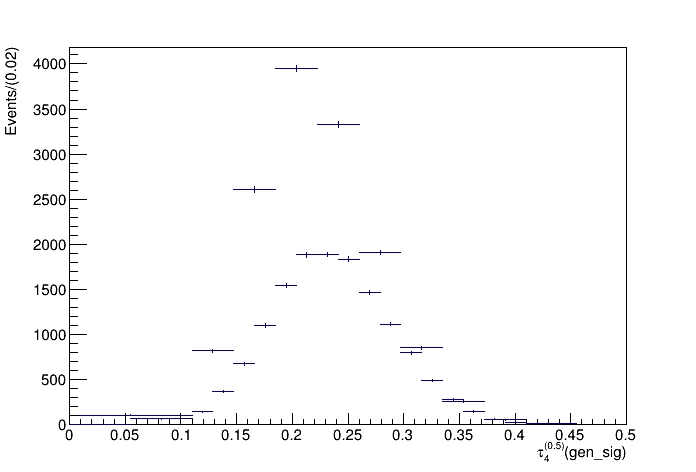

In [56]:
c1 = ROOT.TCanvas("chistMgenMC_sig1", "chistMgenMC_sig1")
histMgenMC_sig.Draw("e")
histMdetMC_sig.Draw("e same")
c1.Draw()

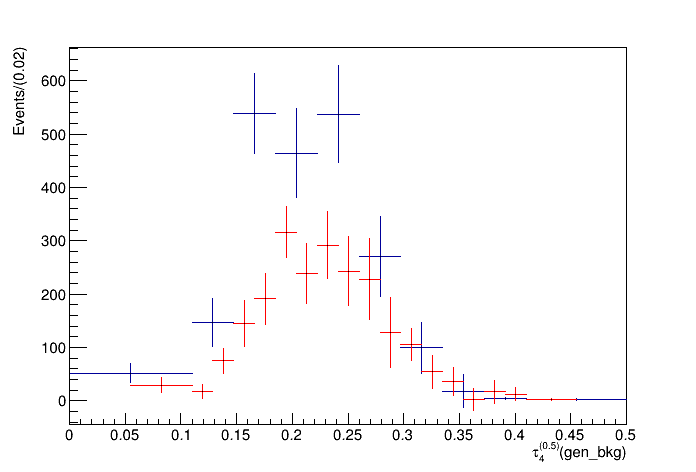

In [57]:
c1 = ROOT.TCanvas("chistMgenMC_bkg1", "chistMgenMC_bkg1")
histMgenMC_bkg.Draw("e")
histMdetMC_bkg.SetLineColor(ROOT.kRed)
histMdetMC_bkg.Draw("e same")
c1.Draw()

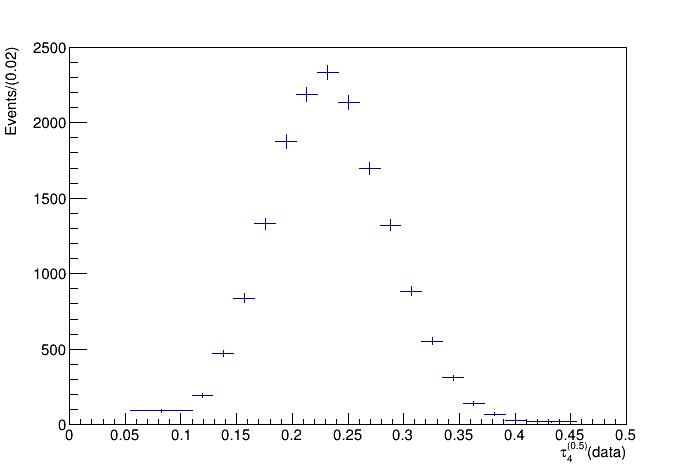

In [58]:
c1 = ROOT.TCanvas("chistMgenMC_sig1", "chistMgenMC_sig1")
#histMgenData.Draw("e")
histMdetData.Draw("e ")
c1.Draw()

### Fill response matrix

In [59]:
response = ROOT.TH2D('response', 'response', det_bins.shape[0]-1, det_bins, gen_bins.shape[0]-1, gen_bins)
hist2Dfill = np.zeros((MC_sig_reco_tau4_0p5.shape[0], 2))
hist2Dfill[:,0] = MC_sig_reco_tau4_0p5.flatten()
hist2Dfill[:,1] = MC_sig_gen_tau4_0p5.flatten()
fill_hist(response, hist2Dfill, weights_MC_sig)
response.SetTitle("Nominal Response Matrix;#tau_{4}^{(0.5)}(det_sig);#tau_{4}^{(0.5)}(gen_sig)")

Warning in <TROOT::Append>: Replacing existing TH1: response (Potential memory leak).


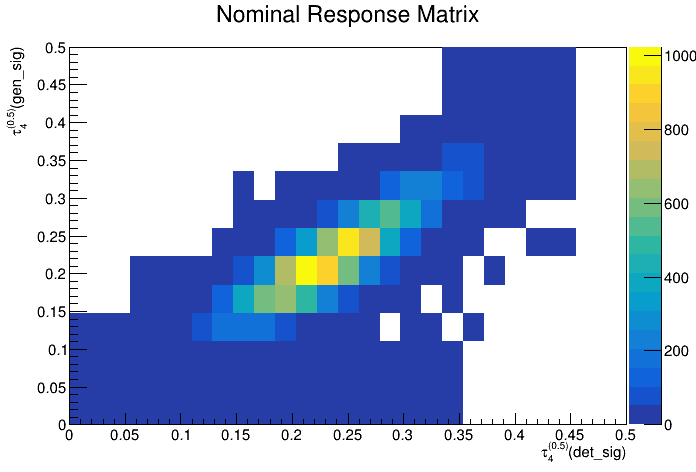

In [60]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

### Purity and Stability calculation

In [61]:
hMC_gen_bkg = ROOT.TH1D(histMgenMC_bkg)
#hMC_gen_bkg.Scale(1./norm_genMC_bkg)

hMC_reco_bkg = ROOT.TH1D(histMdetMC_bkg)
#hMC_reco_bkg.Scale(1./norm_recoMC_bkg)

hMC_gen_sig = ROOT.TH1D(histMgenMC_sig)
#hMC_gen_sig.Scale(1./norm_genMC_sig)

hMC_reco_sig = ROOT.TH1D(histMdetMC_sig)
#hMC_reco_sig.Scale(1./norm_recoMC_sig)

hMC_data = ROOT.TH1D(histMdetData)
#histMgenData.Scale(1./norm_genData)
#histMdetData.Scale(1./norm_detData)

'''
histMgenMC_bkg.Scale(1./norm_genMC_bkg)
histMdetMC_bkg.Scale(1./norm_recoMC_bkg)
histMgenMC_sig.Scale(1./norm_genMC_sig)
histMdetMC_sig.Scale(1./norm_recoMC_sig)

#histMgenData.Scale(1./norm_genData)
histMdetData.Scale(1./norm_detData)
''';

In [62]:
for i in xrange(0, histMdetMC_sig.GetNbinsX()+1):
    print i, hMC_reco_sig.GetBinLowEdge(i), hMC_reco_sig.GetBinContent(i)   
print "=========="
for i in xrange(0, hMC_gen_sig.GetNbinsX()+1):
    print i, hMC_gen_sig.GetBinLowEdge(i), hMC_gen_sig.GetBinContent(i)

0 -0.025 0.0
1 0.0 1.67218312645
2 0.055 67.543597946
3 0.11 145.442583428
4 0.12875 364.773790938
5 0.1475 675.746730955
6 0.16625 1099.98008896
7 0.185 1541.51774985
8 0.20375 1883.12373697
9 0.2225 1887.54061178
10 0.24125 1835.368198
11 0.26 1468.92765834
12 0.27875 1115.38183059
13 0.2975 798.7101206
14 0.31625 493.412751578
15 0.335 279.587833922
16 0.35375 145.896495475
17 0.3725 60.9296367244
18 0.39125 25.9509748647
19 0.41 9.63105527849
20 0.455 0.0
0 -0.05 0.0
1 0.0 107.447098269
2 0.11 820.455009352
3 0.1475 2607.34159666
4 0.185 3948.72670297
5 0.2225 3329.54749809
6 0.26 1908.93071604
7 0.2975 854.858424085
8 0.335 260.69331265
9 0.3725 55.5666467482
10 0.41 7.57062445275


In [63]:
purity = ROOT.TH1D("purity", "Purity and stability study; #tau_{4}^{(0.5)}; ",  gen_bins.shape[0]-1, (gen_bins))
stability = ROOT.TH1D("stability", "Purity and stability study; #tau_{4}^{(0.5)}; ",  gen_bins.shape[0]-1, (gen_bins))
efficiency = ROOT.TH1D("efficiency", "Purity and stability study; #tau_{4}^{(0.5)}; ",  gen_bins.shape[0]-1, (gen_bins))

Warning in <TROOT::Append>: Replacing existing TH1: purity (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: stability (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: efficiency (Potential memory leak).


### With python

We define purity as the fraction of reconstructed events that are generated in the same bin, 
and stability as the fraction of generated events that are reconstructed in the same
bin, divided by the overall reconstruction efficiency per bin. 

In [64]:
gen_arr = MC_sig_gen_tau4_0p5[:]
#print gen_arr[0:20]
#print gen_bins[0:-1]
gen_bin_index = np.digitize(gen_arr, gen_bins)
print gen_bin_index
#print gen_bin_index[0:20]

det_arr = MC_sig_reco_tau4_0p5[0:]
#print det_arr[0:20]
#print det_bins[0:-1]
det_bin_index = np.digitize(det_arr, gen_bins)
det_bin_index2 = np.digitize(det_arr, det_bins)
#print det_bin_index[0:20]

ndet_pergenbin = [0.] #N_recgen array = number of events generated in and reconstructed in gen bin i
ndet_genanywhere = [0.] # number of events reconstructed in gen _bin i but generated anywhere
ngen_detanywhere = [0.] # number of events generated in gen _bin i but reconstructed anywhere

### purity = # of evts generated and reconstructed in gen bin i / # of evts reconstructed in gen bin i but generated anywhere
### stability = # of evts generated and reconstructed in gen bin / # of evts generated in gen bin i but reconstructed anywhere
for i in xrange(0, gen_bins.shape[0]-1):
    
    #print i+1
    
    for k in xrange(0, gen_bin_index.shape[0]):
        
        if gen_bin_index[k]==i+1: 
            ngen_detanywhere[i]+=1 #stability denominator
            if det_bin_index[k]==i+1: ndet_pergenbin[i]+=1
            
    ngen_detanywhere.append(0.)
    ndet_pergenbin.append(0.)
    
    for k in xrange(0, det_bin_index.shape[0]):
        
        if det_bin_index[k]==i+1: 
            ndet_genanywhere[i]+=1 #purity denominator
            
    ndet_genanywhere.append(0.)
    
    print "Setting contents for P, S, eff. histos, in bin %d"%(i+1)
    purity.SetBinContent(i+1, ndet_pergenbin[i]/ndet_genanywhere[i])
    stability.SetBinContent(i+1, ndet_pergenbin[i]/ngen_detanywhere[i])
    efficiency.SetBinContent(i+1, ndet_pergenbin[i]/43107.)
    
    
ndet_pergenbin = np.array(ndet_pergenbin)
ndet_genanywhere = np.array(ndet_genanywhere)
ngen_detanywhere = np.array(ngen_detanywhere)

print "\n\n+++++++++Pure and Stable! :)+++++++++++++\n\n"
print ndet_pergenbin,"\n"
print ndet_genanywhere,"\n"
purity_arr = ndet_pergenbin/ndet_genanywhere
print "Purity array:", purity_arr[:-1], "\n\n"

print ndet_pergenbin,"\n"
print ngen_detanywhere,"\n"
stability_arr = ndet_pergenbin/ngen_detanywhere
print "Stability array:", stability_arr[:-1], "\n\n"

print "+++++Efficiency+++++\n"
efficiency_arr = ndet_pergenbin/np.sum(ngen_detanywhere)
print "Efficiency array:", efficiency_arr[:-1]

[4 5 5 ... 5 1 6]
Setting contents for P, S, eff. histos, in bin 1
Setting contents for P, S, eff. histos, in bin 2
Setting contents for P, S, eff. histos, in bin 3
Setting contents for P, S, eff. histos, in bin 4
Setting contents for P, S, eff. histos, in bin 5
Setting contents for P, S, eff. histos, in bin 6
Setting contents for P, S, eff. histos, in bin 7
Setting contents for P, S, eff. histos, in bin 8
Setting contents for P, S, eff. histos, in bin 9
Setting contents for P, S, eff. histos, in bin 10


+++++++++Pure and Stable! :)+++++++++++++


[  85.  849. 3072. 5271. 4809. 2900. 1381.  432.   92.    9.    0.] 

[  208.  1582.  5529. 10657. 11568.  7997.  3970.  1294.   271.    31.
     0.] 

Purity array: [0.40865385 0.53666245 0.55561584 0.49460449 0.41571577 0.36263599
 0.34785894 0.33384853 0.33948339 0.29032258] 


[  85.  849. 3072. 5271. 4809. 2900. 1381.  432.   92.    9.    0.] 

[  323.  2535.  8197. 12285. 10313.  5854.  2611.   790.   176.    23.
     0.] 

Stability a

/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in divide
/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in divide


In [65]:
ROOT.gStyle.SetOptStat(0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: pse_ttbar


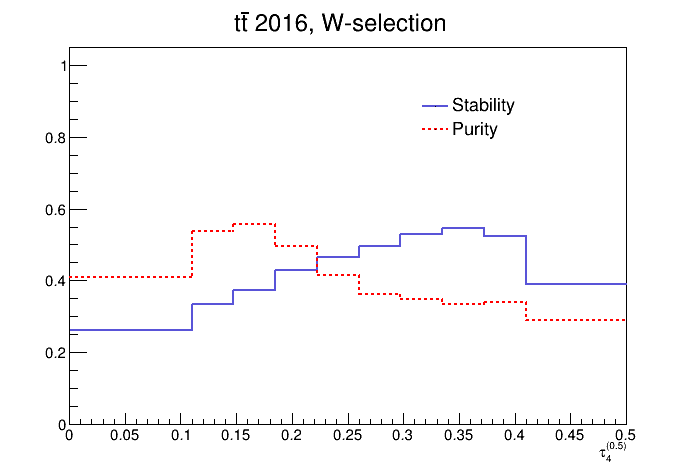

In [66]:
cpse = ROOT.TCanvas("pse_ttbar", "pse_ttbar")

purity.SetLineColor(ROOT.kRed)
purity.SetLineWidth(2)
purity.SetLineStyle(2)
purity.SetMinimum(0.)
purity.SetMaximum(1.05)

stability.SetLineColor(9)
stability.SetLineWidth(2)
stability.SetLineStyle(1)
stability.SetMinimum(0.)
stability.SetMaximum(1.05)
stability.SetTitle("t#bar{t} 2016, W-selection ")
stability.Draw("hist")
purity.Draw("hist same")
#efficiency.Draw("same")

leg0 = ROOT.TLegend(0.6, 0.7, 0.8, 0.8)
leg0.AddEntry( stability, "Stability ")
leg0.AddEntry( purity, "Purity ")
#leg0.AddEntry( histMgenData, "'Truth' (MC: MG5+Pythia8)", 'p')
leg0.SetLineColor(0)
leg0.SetBorderSize(0)
leg0.SetFillStyle(0)

#hs.Add(histMdetMC, "E")
#hs.Add(histMdetData, "E")
#hs.Draw("nostack")
leg0.Draw()

ROOT.gStyle.SetOptStat(0)
cpse.Draw()

(array([[8.500e+01, 9.000e+01, 2.300e+01, 1.000e+01, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.160e+02, 8.490e+02, 5.210e+02, 8.700e+01, 9.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [5.000e+01, 1.121e+03, 3.072e+03, 1.164e+03, 1.140e+02, 7.000e+00,
         1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.300e+01, 4.080e+02, 3.501e+03, 5.271e+03, 1.340e+03, 1.050e+02,
         9.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.800e+01, 5.900e+01, 9.760e+02, 4.669e+03, 4.809e+03, 9.500e+02,
         8.400e+01, 3.000e+00, 0.000e+00, 0.000e+00],
        [1.500e+01, 4.000e+00, 1.000e+02, 1.003e+03, 3.430e+03, 2.900e+03,
         5.190e+02, 2.600e+01, 0.000e+00, 0.000e+00],
        [1.200e+01, 2.000e+00, 3.000e+00, 7.600e+01, 5.750e+02, 1.706e+03,
         1.381e+03, 2.040e+02, 1.100e+01, 0.000e+00],
        [4.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 3.500e+01, 1.810e+02,
         5.730e+02, 4.

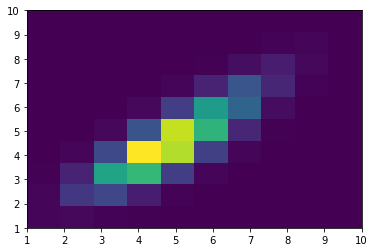

In [67]:
plt.hist2d(x=det_bin_index, y=gen_bin_index)

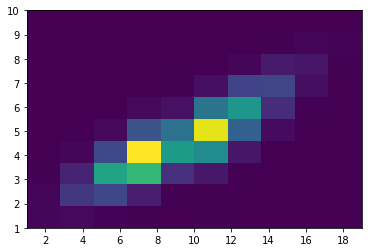

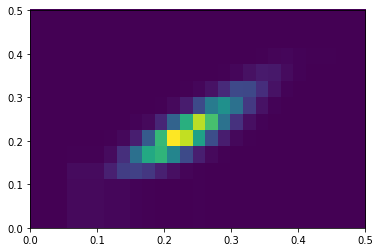

In [68]:
plt.hist2d(x=det_bin_index2, y=gen_bin_index)
plt.show()
plt.hist2d(x=MC_sig_reco_tau4_0p5, y=MC_sig_gen_tau4_0p5, bins=[det_bins, gen_bins])
plt.show()

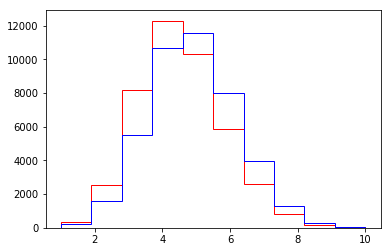

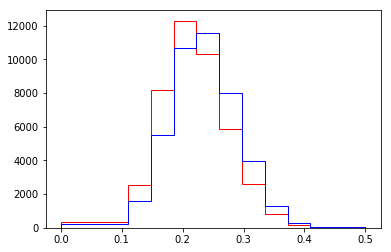

In [69]:
plt.hist(gen_bin_index, histtype='step', color='r')
plt.hist(det_bin_index, histtype='step', color='b')
plt.show()

plt.hist(MC_sig_gen_tau4_0p5, histtype='step', color='r', bins=gen_bins)
plt.hist(MC_sig_reco_tau4_0p5, histtype='step', color='b', bins=gen_bins)
plt.show()

### with root

In [70]:
ps_bindex = 0 

l = 1

tot_col = [] #np.array([0. for i in xrange(0, purity.GetNbinsX()+1)]) #
#tot_col_err = [] #0 

tot_row = np.array([0. for i in xrange(1, purity.GetNbinsX()+1)])
#tot_row_err = np.zeros_like([0. for i in xrange(1, purity.GetNbinsX()+1)])

diag = [] #np.zeros_like([0. for i in xrange(1, purity.GetNbinsX()+1)])
#diag_error = [] # np.zeros_like([0. for i in xrange(1, purity.GetNbinsX()+1)])

for i in range(0, response.GetNbinsY()+1):    
    
    k = 0
    col = 0.
    d_jj = 0.
    for j in range(1, response.GetNbinsX()+1):
    
        r_ij = response.GetBinContent(i,j)
        #r_ij_err = response.GetBinError(i,j)
        #print (i,j), r_ij
        
        if (j)%2==0 and j < (response.GetNbinsX()+1):
            #since 2 reco bins per 1 gen bin
            print "Filling row index k={} with elements (i,j)=({},{})".format(k,i,j)
            tot_row[k] += r_ij
            print "Filling row index k={} with elements (i,j)=({},{})".format(k,i,j+1)
            tot_row[k] +=  response.GetBinContent(i,j+1)
            
            #tot_col_err[k] += response.GetBinError(i,j)
            #tot_col_err[k] +=  response.GetBinError(i,j+1)
            
            k +=1
        
        col += r_ij
        
        if l==j:
            print "Adding content (equal to {}) of bin i={}, j={} to Diagonal".format(r_ij, i,j), l
            d_jj += r_ij
 
            print "Adding content (equal to {}) of bin i={}, j={} to Diagonal".format( response.GetBinContent(i,j+1), i,j+1), l
            d_jj += response.GetBinContent(i,j+1)

            diag.append(d_jj)
    l = l+2
    print col, d_jj

Adding content (equal to 0.0) of bin i=0, j=1 to Diagonal 1
Adding content (equal to 0.0) of bin i=0, j=2 to Diagonal 1
Filling row index k=0 with elements (i,j)=(0,2)
Filling row index k=0 with elements (i,j)=(0,3)
Filling row index k=1 with elements (i,j)=(0,4)
Filling row index k=1 with elements (i,j)=(0,5)
Filling row index k=2 with elements (i,j)=(0,6)
Filling row index k=2 with elements (i,j)=(0,7)
Filling row index k=3 with elements (i,j)=(0,8)
Filling row index k=3 with elements (i,j)=(0,9)
Filling row index k=4 with elements (i,j)=(0,10)
Filling row index k=4 with elements (i,j)=(0,11)
Filling row index k=5 with elements (i,j)=(0,12)
Filling row index k=5 with elements (i,j)=(0,13)
Filling row index k=6 with elements (i,j)=(0,14)
Filling row index k=6 with elements (i,j)=(0,15)
Filling row index k=7 with elements (i,j)=(0,16)
Filling row index k=7 with elements (i,j)=(0,17)
Filling row index k=8 with elements (i,j)=(0,18)
Filling row index k=8 with elements (i,j)=(0,19)
Fillin

In [71]:
print diag
print tot_row
print diag/tot_row

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[3.39088549e+03 5.64098894e+03 3.71218412e+02 1.16916608e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[ 0.  0.  0.  0. nan nan nan nan nan nan]


/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
purity_reco_binning = [0] 
diag = 0
for i in range(1, response.GetNbinsX()+1):
    for j in range(1, response.GetNbinsY()+1):
        dval = response.GetBinContent(i,j)
        if i==j:
            diag = diag+dval
            print i, j, 
            if i==0 and j==0: purity_reco_binning[0] = dval/
            else: purity_reco_binning.append()
        j = j+2

SyntaxError: invalid syntax (<ipython-input-72-dc72c7765764>, line 9)

### Unfolding 

In [73]:
print 'getting tunfolder:'

orientation = ROOT.TUnfoldDensity.kHistMapOutputHoriz
regMode = ROOT.TUnfoldDensity.kRegModeCurvature
con = ROOT.TUnfoldDensity.kEConstraintNone
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
errmode = ROOT.TUnfoldSys.kSysErrModeMatrix
#tunfolder_MC = ROOT.TUnfoldDensity(response, orientation, regMode, con, mode, "signal", "*[UOb]")
#tunfolder_data = ROOT.TUnfoldDensity(response, orientation, regMode, con, mode, "signal", "*[UOb]")

tunfolder_MC = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)
tunfolder_data = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

getting tunfolder:


Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 20 input bins and 10 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{4}^{(0.5)}(gen_sig)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #11 (yaxis:#tau_{4}^{(0.5)}(gen_sig)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSteering=*[UOB]
Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 20 input bins and 10 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{4}^{(0.5)}(gen_sig)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #11 (yaxis:#tau_{4}^{(0.5)}(gen_sig)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSt

Set the input, a 1D reconstructed histogram from either MC_sig (closure) or Data (measurement) , binned in the detector level binning. Subtract background contributions from data, using reco-MC bkg.

In [74]:
print 'setting reco input'
tunfolder_data.SetInput( histMdetData )
tunfolder_data.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

setting reco input


In [75]:
print 'setting reco MC input'
tunfolder_MC.SetInput( histMdetMC_sig )
#tunfolder_MC.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

setting reco MC input


1

Warning in <TUnfoldDensity::SetInput>: One input bin has zero error, and is ignored.


In [76]:
unfolded_data = tunfolder_data.DoUnfold(0.)
unfolded_data = tunfolder_data.GetOutput("unfolded_data")

unfolded_MC = tunfolder_MC.DoUnfold(0.)
unfolded_MC = tunfolder_MC.GetOutput("unfolded_MC")

Warning in <TROOT::Append>: Replacing existing TH1: unfolded_data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: unfolded_MC (Potential memory leak).


In [77]:
ROOT.gStyle.SetOptStat(0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5
Info in <TCanvas::Print>: png file tau4_0p5_unfolding_Escheme_bkgsub.png has been created
Info in <TCanvas::Print>: pdf file tau4_0p5_unfolding_Escheme_bkgsub.pdf has been created


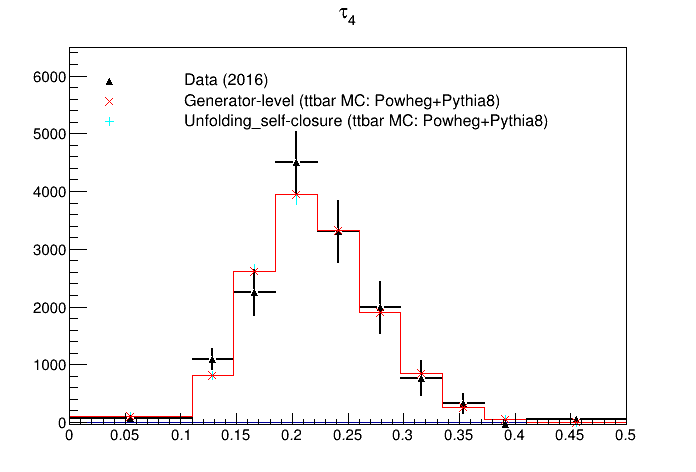

In [78]:
c5 = ROOT.TCanvas('c5', 'c5')

unfolded_MC.SetMarkerStyle(2)
unfolded_MC.SetMarkerColor(7)
unfolded_MC.SetLineColor(7)
unfolded_MC.SetLineWidth(1)

unfolded_data.SetMarkerStyle(22)
unfolded_data.SetMarkerColor(1)
unfolded_data.SetLineColor(1)
unfolded_data.SetLineWidth(2)


#unfolded_MC.SetFillColor(0)
#histMgenData.SetMarkerStyle(4)
#histMgenData.SetMarkerColor(2)
#histMgenData.SetOption("E")
#histMgenData.SetLineColor(2)
histMgenMC_sig.SetMarkerStyle(5)
histMgenMC_sig.SetMarkerColor(2)
histMgenMC_sig.SetLineColor(2)



hs = ROOT.THStack("#tau_{4}", "#tau_{4}")
#hs.Add
hs.SetMaximum(6500)
#hs.Add( histMgenData, "E HIST")
hs.Add( unfolded_MC, "E HIST")
hs.Add( unfolded_data, "E ")
hs.Add(histMgenMC_sig, "E HIST")
#hs.Add(histMdetMC_sig, "E")
#hs.Add(histMdetData, "E")

leg0 = ROOT.TLegend(0.05, 0.72, 0.91, 0.85)
leg0.AddEntry( unfolded_data, "Data (2016)", 'p')
leg0.AddEntry( histMgenMC_sig, "Generator-level (ttbar MC: Powheg+Pythia8)", 'p')
#leg0.AddEntry( histMgenData, "'Truth' (MC: MG5+Pythia8)", 'p')
leg0.AddEntry( unfolded_MC, "Unfolding_self-closure (ttbar MC: Powheg+Pythia8)", 'p')
leg0.SetLineColor(0)
leg0.SetBorderSize(0)
leg0.SetFillStyle(0)

#hs.Add(histMdetMC, "E")
#hs.Add(histMdetData, "E")
hs.Draw("nostack")
leg0.Draw()

c5.Draw()
c5.SaveAs("tau4_0p5_unfolding_Escheme_bkgsub.png")
c5.SaveAs("tau4_0p5_unfolding_Escheme_bkgsub.pdf")

In [79]:
ratio = ROOT.TH1D("","; #tau_{4}^{(1)}",  gen_bins.shape[0]-1, (gen_bins))
ratio.GetXaxis().SetTitle("#tau_{4}^{(1)}");
#ratio.GetYaxis().SetTitleOffset(0.);
ratio.GetYaxis().CenterTitle(ROOT.kTRUE);
ratio.GetXaxis().CenterTitle(ROOT.kTRUE);
ratio.GetYaxis().SetRangeUser(0.7,1.3)
ratio.Add(unfolded_MC)
ratio.GetYaxis().SetTitle("#frac{Unfolded Powheg}{Gen-level Powheg}")
ratio.Sumw2()
ratio.SetStats(0)
ratio.Divide(histMgenMC_sig);
ratio.GetYaxis().SetLabelSize(0.09)
ratio.GetXaxis().SetLabelSize(0.09)
#ratio.SetMarkerStyle(1)
ratio.SetMarkerColor(ROOT.kRed)
ratio.SetLineColor(ROOT.kRed)
ratio.GetYaxis().SetTitleSize(0.12)
ratio.GetYaxis().SetTitleOffset(0.4)
ratio.GetXaxis().SetTitleSize(0.12)
ratio.GetXaxis().SetTitleOffset(0.85)

print "Bin Content", "\t", "Bin error", "\t", "Bin Center", "\t", "Bin Low-Edge", "\t", "Ratio to Truth for bin", "\t", "Ratio Error"
for i in xrange(1,gen_bins.shape[0]):
    print "%0.4f"%unfolded_MC.GetBinContent(i), "\t", "%0.4f"%unfolded_MC.GetBinError(i), "\t", unfolded_MC.GetBinCenter(i), "\t", unfolded_MC.GetBinLowEdge(i), "%0.4f"%ratio.GetBinContent(i), "%0.4f"%ratio.GetBinError(i)

Bin Content 	Bin error 	Bin Center 	Bin Low-Edge 	Ratio to Truth for bin 	Ratio Error
107.4471 	22.4407 	0.055 	0.0 1.0000 0.2166
820.4550 	65.6313 	0.12875 	0.11 1.0000 0.0826
2607.3416 	133.1082 	0.16625 	0.1475 1.0000 0.0523
3948.7267 	177.6482 	0.20375 	0.185 1.0000 0.0460
3329.5475 	171.2859 	0.24125 	0.2225 1.0000 0.0525
1908.9307 	136.2075 	0.27875 	0.26 1.0000 0.0726
854.8584 	92.3146 	0.31625 	0.2975 1.0000 0.1099
260.6933 	51.3972 	0.35375 	0.335 1.0000 0.2006
55.5666 	23.0599 	0.39125 	0.3725 1.0000 0.4227
7.5706 	6.9079 	0.455 	0.41 1.0000 0.9379


Info in <TCanvas::Print>: png file tau_4_0p5_MC_SC_ratio_Escheme_bkgsub.png has been created
Info in <TCanvas::Print>: pdf file tau_4_0p5_MC_SC_ratio_Escheme_bkgsub.pdf has been created


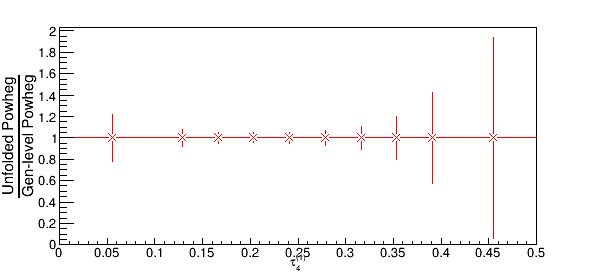

In [80]:
c6 = ROOT.TCanvas("c6","c6", 600,300)
ratio.GetYaxis().SetLabelSize(0.05)
ratio.GetXaxis().SetLabelSize(0.05)
#ratio.SetMarkerStyle(1)
ratio.SetMarkerStyle(5)
ratio.SetMarkerColor(ROOT.kRed)
ratio.SetLineColor(ROOT.kRed)
ratio.GetYaxis().SetTitleSize(0.06)
ratio.GetYaxis().SetTitleOffset(0.7)
ratio.GetXaxis().SetTitleSize(0.05)
ratio.GetXaxis().SetTitleOffset(0.8)
#ratio.SetMinimum(0.7)
#ratio.SetMaximum(1.3)
#ratio.SetMarkerStyle(21);
ratio.Draw("ep")
c6.Draw()
c6.SaveAs("tau_4_0p5_MC_SC_ratio_Escheme_bkgsub.png")
c6.SaveAs("tau_4_0p5_MC_SC_ratio_Escheme_bkgsub.pdf")

In [81]:
# get unfolding output
# includes the statistical and background errors
# but not the other systematic uncertainties
#tunfolder_data.SetInput( histMdetData )
tunfolder_data.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

histUnfoldOutput= tunfolder_data.GetOutput("unfolded_data")

# retreive error matrix of statistical errors
histEmatStat=tunfolder_data.GetEmatrixInput("unfolding stat error matrix");
# retreive full error matrix
# This includes all systematic errors
histEmatTotal=tunfolder_data.GetEmatrixTotal("unfolding total error matrix");
# create two copies of the unfolded data, one with statistical errors
# the other with total errors
histUnfoldStat=ROOT.TH1D("tau4_0p5(unfold,staterr)",";tau4_0p5(gen)",  gen_bins.shape[0]-1, (gen_bins));
histUnfoldTotal=ROOT.TH1D("tau4_0p5(unfold,totalerr)",";tau4_0p5(gen)",  gen_bins.shape[0]-1, (gen_bins));

for i in xrange(0, gen_bins.shape[0]): 
    c=histUnfoldOutput.GetBinContent(i);
    # histogram with unfolded data and stat errors
    histUnfoldStat.SetBinContent(i,c);
    histUnfoldStat.SetBinError(i,np.sqrt(histEmatStat.GetBinContent(i,i)));
    # histogram with unfolded data and total errors
    histUnfoldTotal.SetBinContent(i,c);
    histUnfoldTotal.SetBinError(i,np.sqrt(histEmatTotal.GetBinContent(i,i)));

# create histogram with correlation matrix
histCorr=ROOT.TH2D("Corr(total)",";tau4_0p5(gen);tau4_0p5(gen)",  gen_bins.shape[0]-1, (gen_bins), gen_bins.shape[0]-1, (gen_bins));
for i in xrange(0, gen_bins.shape[0]): 
    ei,ej = 0,0
    ei=np.sqrt(histEmatTotal.GetBinContent(i,i));
    if(ei<=0.0): continue
    for j in xrange(0, gen_bins.shape[0]):
        ej=np.sqrt(histEmatTotal.GetBinContent(j,j));
        if(ej<=0.0): continue
        histCorr.SetBinContent(i,j,histEmatTotal.GetBinContent(i,j)/ei/ej);

# retreive bgr source 1
#histdetNormBgr1=tunfolder_data.GetBackground("bgr1 normalized", "background1");
histMdetNormBgrTotal=tunfolder_data.GetBackground("bkg_all");
#========================


Error in <TUnfoldDensity::SubtractBackground>: Source bkg_all given twice, ignoring 2nd call.

Warning in <TROOT::Append>: Replacing existing TH1: unfolded_data (Potential memory leak).


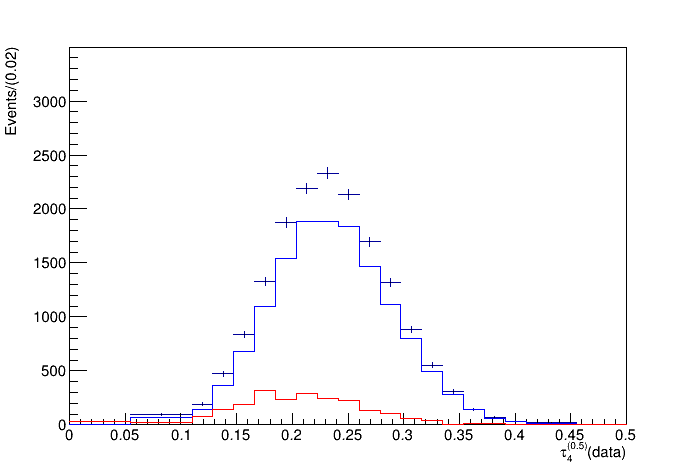

In [82]:
# Step 7: plots
output = ROOT.TCanvas();
#output.Divide(3,2);
#output.cd(1);
# data, MC prediction, background
#histMdetData.SetMinimum(0.0);
histMdetData.SetMaximum(histMdetData.GetMaximum()*1.5);
histMdetData.Draw("E");
#histMdetMC_sig.SetMinimum(0.0);
histMdetMC_sig.SetLineColor(ROOT.kBlue);
histMdetNormBgrTotal.SetLineColor(ROOT.kRed);
#histdetNormBgr1.SetLineColor(ROOT.kCyan);
histMdetMC_sig.Draw("SAME HIST");
#histdetNormBgr1.Draw("SAME HIST");
histMdetNormBgrTotal.Draw("SAME HIST");
output.Draw()

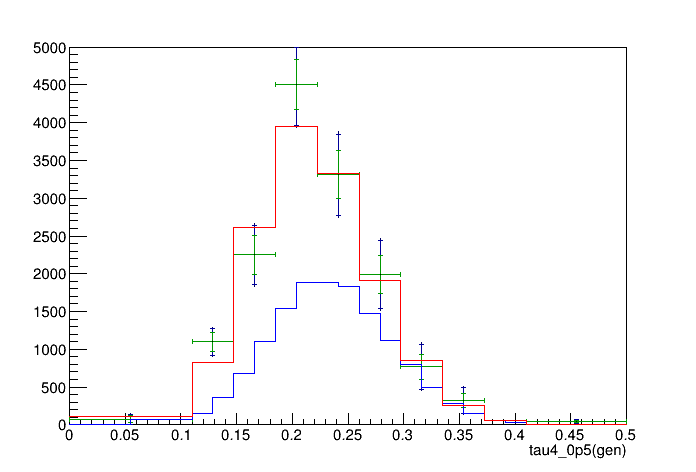

In [83]:
#output.cd(2)
# unfolded data, data truth, MC truth
output = ROOT.TCanvas();
histUnfoldTotal.SetMinimum(0.0);
histUnfoldTotal.SetMaximum(5000);
histUnfoldTotal.SetLineColor(ROOT.kBlue+3)
histUnfoldTotal.SetLineWidth(1)
# outer error: total error
histUnfoldTotal.Draw("E");
# middle error: stat+bgr
histUnfoldOutput.SetLineWidth(1)
histUnfoldOutput.Draw("SAME E1");
# inner error: stat only
histUnfoldStat.SetLineColor(ROOT.kGreen+2)
histUnfoldStat.Draw("SAME E1");

histMdetMC_sig.Draw("SAME HIST");
histMgenMC_sig.Draw("SAME HIST");
#histBbbSignalGen.SetLineColor(ROOT.kBlue);
#histBbbSignalGen.Draw("SAME HIST");
output.Draw()

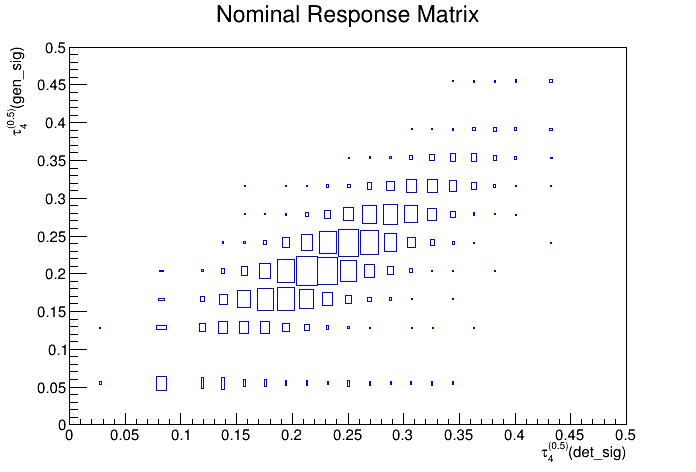

In [84]:
output.cd(3);
# unfolding matrix
response.SetLineColor(ROOT.kBlue);
response.Draw("BOX");

output.Draw()

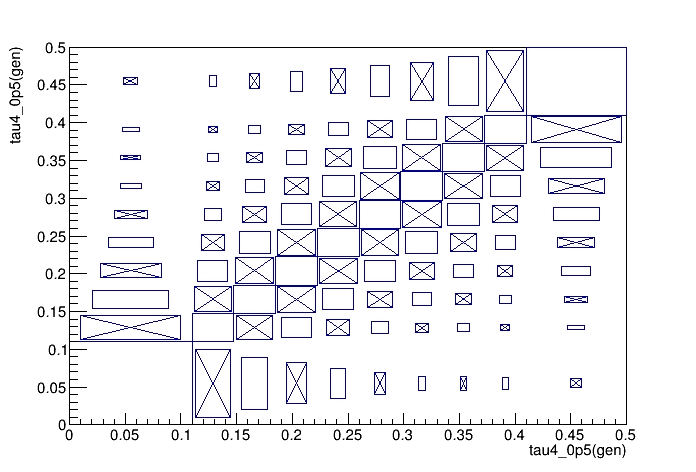

In [85]:
# show tau as a function of chi**2
output.cd(4);
#logTauX.Draw();
#bestLogTauLogChi2.SetMarkerColor(ROOT.kRed);
#bestLogTauLogChi2.Draw("*");
# show the L curve
output.cd(5);
#lCurve.Draw("AL");
#bestLcurve.SetMarkerColor(ROOT.kRed);
#bestLcurve.Draw("*");
# show correlation matrix
output.cd(6);
histCorr.Draw("BOX");
output.Draw()

# $\tau_{4}^{(1)}$ unfolding with background subtraction + purity&stability study [w/ E-scheme recombination+excl. $k_T$ axes]


In [86]:
Wjets_gen_tau4_1 = Wjets_gen_nSub_basis[:,10]

ST1_gen_tau4_1 = ST1_gen_nSub_basis[:,10]

ST2_gen_tau4_1 = ST2_gen_nSub_basis[:,10]

ST3_gen_tau4_1 = ST3_gen_nSub_basis[:,10]

ST4_gen_tau4_1 = ST4_gen_nSub_basis[:,10]

ST5_gen_tau4_1 = ST5_gen_nSub_basis[:,10]

TTbar_gen_tau4_1 = TTbar_gen_nSub_basis[:,10]

In [87]:
Wjets_reco_tau4_1 = Wjets_reco_nSub_basis[:,10]

ST1_reco_tau4_1 = ST1_reco_nSub_basis[:,10]

ST2_reco_tau4_1 = ST2_reco_nSub_basis[:,10]

ST3_reco_tau4_1 = ST3_reco_nSub_basis[:,10]

ST4_reco_tau4_1 = ST4_reco_nSub_basis[:,10]

ST5_reco_tau4_1 = ST5_reco_nSub_basis[:,10]

TTbar_reco_tau4_1 = TTbar_reco_nSub_basis[:,10]

# Unfolding $\tau_{4}^{(1)}$ with background subtraction

In [88]:
MC_sig_reco_tau4_1 = TTbar_reco_tau4_1
MC_sig_gen_tau4_1 = TTbar_gen_tau4_1

MC_bkg_reco_tau4_1 = np.concatenate((ST1_reco_tau4_1,ST2_reco_tau4_1,ST3_reco_tau4_1,ST4_reco_tau4_1,ST5_reco_tau4_1,Wjets_reco_tau4_1))
MC_bkg_gen_tau4_1 = np.concatenate((ST1_gen_tau4_1,ST2_gen_tau4_1,ST3_gen_tau4_1,ST4_gen_tau4_1,ST5_gen_tau4_1,Wjets_gen_tau4_1))

data_tau4_1 = data_nSub_basis[:,10]
weights_MC_sig = weight_TTbar
weights_MC_bkg = np.concatenate((weight_ST1,weight_ST2,weight_ST3,weight_ST4,weight_ST5,weight_Wjets))

Get the response matrix and input 1D distributions for unfolding.

In [89]:
print np.min(MC_sig_gen_tau4_1)
print np.min(MC_sig_reco_tau4_1)
print np.max(MC_sig_gen_tau4_1)
print np.max(MC_sig_reco_tau4_1), "\n"


print np.min(MC_bkg_gen_tau4_1)
print np.min(MC_bkg_reco_tau4_1)
print np.max(MC_bkg_gen_tau4_1)
print np.max(MC_bkg_reco_tau4_1), "\n"


print np.min(data_tau4_1)
print np.max(data_tau4_1)

8.213092951336876e-05
0.004312112927436829
0.22934702038764954
0.2325347363948822 

0.0067474800162017345
0.007606447208672762
0.22254718840122223
0.21426723897457123 

0.0052561163902282715
0.25678831338882446


#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

In [150]:
gen_bins = np.array([x for x in np.linspace(num=9, start=0., stop=0.22)])
gen_bins = np.concatenate((gen_bins, np.array([ 0.26])))
print gen_bins, gen_bins.shape[0]

det_bins = np.array([x for x in np.linspace(num=17, start=0., stop=0.22)])
det_bins = np.concatenate((det_bins, np.array([0.24, 0.26])))
print det_bins, det_bins.shape[0]

[0.     0.0275 0.055  0.0825 0.11   0.1375 0.165  0.1925 0.22   0.26  ] 10
[0.      0.01375 0.0275  0.04125 0.055   0.06875 0.0825  0.09625 0.11
 0.12375 0.1375  0.15125 0.165   0.17875 0.1925  0.20625 0.22    0.24
 0.26   ] 19


In [151]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

#### Fill histograms for sig and bkg. MC separately in this case (as one should!)

In [152]:
histMgenMC_bkg = ROOT.TH1D("histMgenMC_bkg", "histMgenMC_bkg; #tau_{4}^{(1)}; Events/(0.02)",  gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenMC_bkg, MC_bkg_gen_tau4_1, weights=weights_MC_bkg)

histMdetMC_bkg = ROOT.TH1D("histMdetMC_bkg", "histMdetMC_bkg; #tau_{4}^{(1)}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetMC_bkg, MC_bkg_reco_tau4_1, weights=weights_MC_bkg)

histMgenMC_sig = ROOT.TH1D("histMgenMC_sig", "histMgenMC_sig; #tau_{4}^{(1)}; Events/(0.02)",  gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenMC_sig, MC_sig_gen_tau4_1, weights=weights_MC_sig)

histMdetMC_sig = ROOT.TH1D("histMdetMC_sig", "histMdetMC_sig; #tau_{4}^{(1)}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetMC_sig, MC_sig_reco_tau4_1, weights=weights_MC_sig)

#histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{4}^{(1)}; Events/(0.02)", gen_bins.shape[0]-1, (gen_bins))
#fill_hist(histMgenData, TTbartruth_nSub_basis[:,4]/TTbartruth_nSub_basis[:,1])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{4}^{(1)}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetData, data_tau4_1)

Warning in <TROOT::Append>: Replacing existing TH1: histMgenMC_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMgenMC_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetMC_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetMC_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMgenMC_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMgenMC_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetMC_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetMC_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetData (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetData (Potential memory leak).


Set the X and Y axis labels

In [153]:
histMgenMC_bkg.SetTitle(";#tau_{4}^{(1)}(gen_bkg)")

histMdetMC_bkg.SetTitle(";#tau_{4}^{(1)}(det_bkg)")

histMgenMC_sig.SetTitle(";#tau_{4}^{(1)}(gen_sig)")

histMdetMC_sig.SetTitle(";#tau_{4}^{(1)}(det_sig)")

histMdetData.SetTitle(";#tau_{4}^{(1)}(data)")


Draw the variables at reco and gen level and for "data"

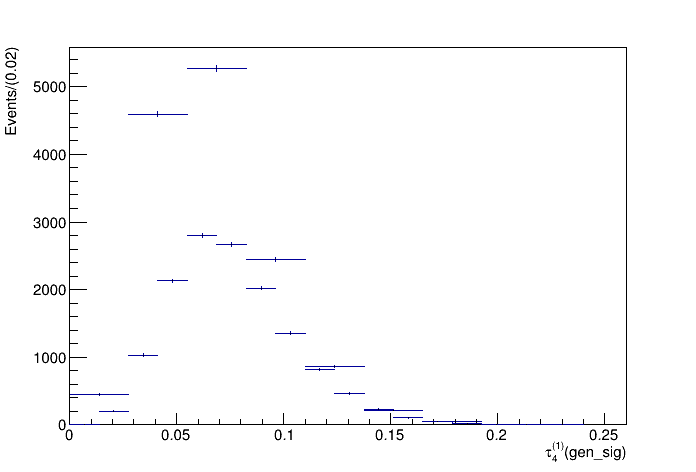

In [154]:
c1 = ROOT.TCanvas("chistMgenMC_sig1", "chistMgenMC_sig1")
histMgenMC_sig.Draw("e")
histMdetMC_sig.Draw("e same")
c1.Draw()

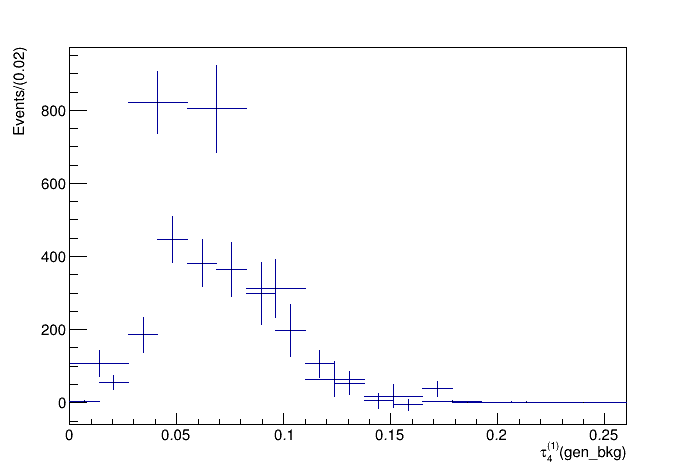

In [155]:
c1 = ROOT.TCanvas("chistMgenMC_bkg1", "chistMgenMC_bkg1")
histMgenMC_bkg.Draw("e")
histMdetMC_bkg.Draw("e same")
c1.Draw()

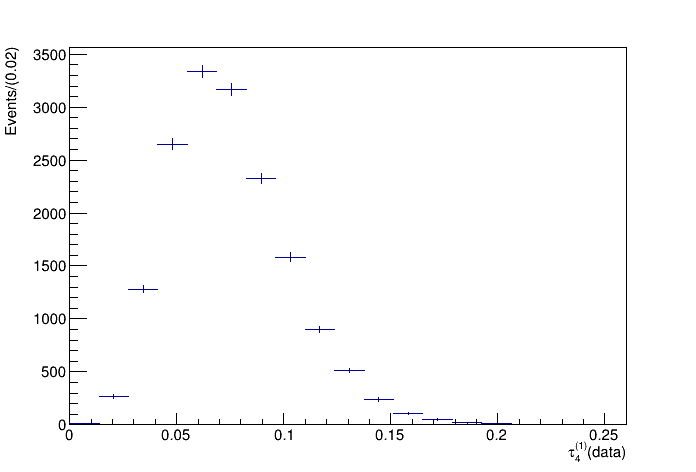

In [156]:
c1 = ROOT.TCanvas("chistMgenMC_sig1", "chistMgenMC_sig1")
#histMgenData.Draw("e")
histMdetData.Draw("e ")
c1.Draw()

### Fill response matrix

In [157]:
response = ROOT.TH2D('response', 'response', det_bins.shape[0]-1, det_bins, gen_bins.shape[0]-1, gen_bins)
hist2Dfill = np.zeros((MC_sig_reco_tau4_1.shape[0], 2))
hist2Dfill[:,0] = MC_sig_reco_tau4_1.flatten()
hist2Dfill[:,1] = MC_sig_gen_tau4_1.flatten()
fill_hist(response, hist2Dfill, weights_MC_sig)
response.SetTitle("Nominal Response Matrix;#tau_{4}^{(1)}(det_sig);#tau_{4}^{(1)}(gen_sig)")

Warning in <TROOT::Append>: Replacing existing TH1: response (Potential memory leak).


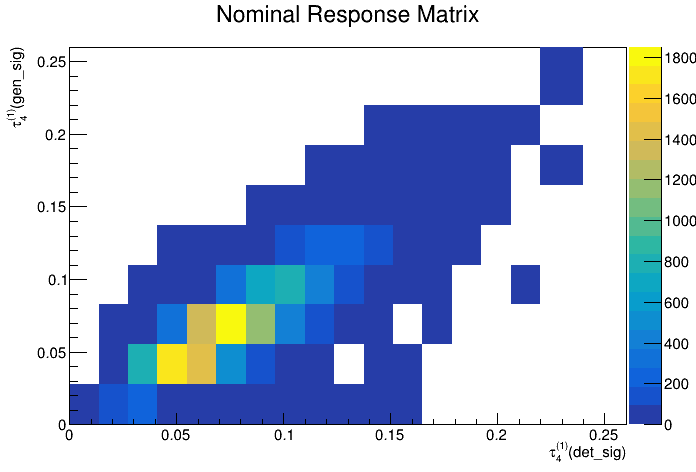

In [158]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

### Purity and Stability calculation

In [159]:
hMC_gen_bkg = ROOT.TH1D(histMgenMC_bkg)
#hMC_gen_bkg.Scale(1./norm_genMC_bkg)

hMC_reco_bkg = ROOT.TH1D(histMdetMC_bkg)
#hMC_reco_bkg.Scale(1./norm_recoMC_bkg)

hMC_gen_sig = ROOT.TH1D(histMgenMC_sig)
#hMC_gen_sig.Scale(1./norm_genMC_sig)

hMC_reco_sig = ROOT.TH1D(histMdetMC_sig)
#hMC_reco_sig.Scale(1./norm_recoMC_sig)

hMC_data = ROOT.TH1D(histMdetData)
#histMgenData.Scale(1./norm_genData)
#histMdetData.Scale(1./norm_detData)

'''
histMgenMC_bkg.Scale(1./norm_genMC_bkg)
histMdetMC_bkg.Scale(1./norm_recoMC_bkg)
histMgenMC_sig.Scale(1./norm_genMC_sig)
histMdetMC_sig.Scale(1./norm_recoMC_sig)

#histMgenData.Scale(1./norm_genData)
histMdetData.Scale(1./norm_detData)
''';

In [160]:
for i in xrange(0, histMdetMC_sig.GetNbinsX()+1):
    print i, hMC_reco_sig.GetBinLowEdge(i), hMC_reco_sig.GetBinContent(i)   
print "=========="
for i in xrange(0, hMC_gen_sig.GetNbinsX()+1):
    print i, hMC_gen_sig.GetBinLowEdge(i), hMC_gen_sig.GetBinContent(i)

0 -0.0144444444444 0.0
1 0.0 7.05334893869
2 0.01375 203.599382486
3 0.0275 1031.39512583
4 0.04125 2129.23248953
5 0.055 2795.33059734
6 0.06875 2668.26111749
7 0.0825 2021.70877773
8 0.09625 1357.27115607
9 0.11 820.842338918
10 0.12375 458.057909999
11 0.1375 231.930303507
12 0.15125 104.90997192
13 0.165 47.9729468758
14 0.17875 17.0500809509
15 0.1925 3.97782486929
16 0.20625 1.48545871043
17 0.22 1.05879814989
18 0.24 0.0
0 -0.0288888888889 0.0
1 0.0 446.514877036
2 0.0275 4597.78119375
3 0.055 5277.36765919
4 0.0825 2451.52085551
5 0.11 864.477091291
6 0.1375 213.434431433
7 0.165 43.7850532325
8 0.1925 5.57638533104
9 0.22 0.680082543972


In [161]:
purity = ROOT.TH1D("purity", "Purity and stability study; #tau_{4}^{(1)}; ",  gen_bins.shape[0]-1, (gen_bins))
stability = ROOT.TH1D("stability", "Purity and stability study; #tau_{4}^{(1)}; ",  gen_bins.shape[0]-1, (gen_bins))
efficiency = ROOT.TH1D("efficiency", "Purity and stability study; #tau_{4}^{(1)}; ",  gen_bins.shape[0]-1, (gen_bins))

Warning in <TROOT::Append>: Replacing existing TH1: purity (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: stability (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: efficiency (Potential memory leak).


### With python

We define purity as the fraction of reconstructed events that are generated in the same bin, 
and stability as the fraction of generated events that are reconstructed in the same
bin, divided by the overall reconstruction efficiency per bin. 

In [162]:
gen_arr = MC_sig_gen_tau4_1[:]
#print gen_arr[0:20]
#print gen_bins[0:-1]
gen_bin_index = np.digitize(gen_arr, gen_bins)
print gen_bin_index
#print gen_bin_index[0:20]

det_arr = MC_sig_reco_tau4_1[0:]
#print det_arr[0:20]
#print det_bins[0:-1]
det_bin_index = np.digitize(det_arr, gen_bins)
det_bin_index2 = np.digitize(det_arr, det_bins)
#print det_bin_index[0:20]

ndet_pergenbin = [0.] #N_recgen array = number of events generated in and reconstructed in gen bin i
ndet_genanywhere = [0.] # number of events reconstructed in gen _bin i but generated anywhere
ngen_detanywhere = [0.] # number of events generated in gen _bin i but reconstructed anywhere

### purity = # of evts generated and reconstructed in gen bin i / # of evts reconstructed in gen bin i but generated anywhere
### stability = # of evts generated and reconstructed in gen bin / # of evts generated in gen bin i but reconstructed anywhere
for i in xrange(0, gen_bins.shape[0]-1):
    
    #print i+1
    
    for k in xrange(0, gen_bin_index.shape[0]):
        
        if gen_bin_index[k]==i+1: 
            ngen_detanywhere[i]+=1 #stability denominator
            if det_bin_index[k]==i+1: ndet_pergenbin[i]+=1
            
    ngen_detanywhere.append(0.)
    ndet_pergenbin.append(0.)
    
    for k in xrange(0, det_bin_index.shape[0]):
        
        if det_bin_index[k]==i+1: 
            ndet_genanywhere[i]+=1 #purity denominator
            
    ndet_genanywhere.append(0.)
    
    print "Setting contents for P, S, eff. histos, in bin %d"%(i+1)
    purity.SetBinContent(i+1, ndet_pergenbin[i]/ndet_genanywhere[i])
    stability.SetBinContent(i+1, ndet_pergenbin[i]/ngen_detanywhere[i])
    efficiency.SetBinContent(i+1, ndet_pergenbin[i]/43107.)
    
    
ndet_pergenbin = np.array(ndet_pergenbin)
ndet_genanywhere = np.array(ndet_genanywhere)
ngen_detanywhere = np.array(ngen_detanywhere)

print "\n\n+++++++++Pure and Stable! :)+++++++++++++\n\n"
print ndet_pergenbin,"\n"
print ndet_genanywhere,"\n"
purity_arr = ndet_pergenbin/ndet_genanywhere
print "Purity array:", purity_arr[:-1], "\n\n"

print ndet_pergenbin,"\n"
print ngen_detanywhere,"\n"
stability_arr = ndet_pergenbin/ngen_detanywhere
print "Stability array:", stability_arr[:-1], "\n\n"

print "+++++Efficiency+++++\n"
efficiency_arr = ndet_pergenbin/np.sum(ngen_detanywhere)
print "Efficiency array:", efficiency_arr[:-1]

[2 3 3 ... 3 1 4]
Setting contents for P, S, eff. histos, in bin 1
Setting contents for P, S, eff. histos, in bin 2
Setting contents for P, S, eff. histos, in bin 3
Setting contents for P, S, eff. histos, in bin 4
Setting contents for P, S, eff. histos, in bin 5
Setting contents for P, S, eff. histos, in bin 6
Setting contents for P, S, eff. histos, in bin 7
Setting contents for P, S, eff. histos, in bin 8
Setting contents for P, S, eff. histos, in bin 9


+++++++++Pure and Stable! :)+++++++++++++


[4.070e+02 7.745e+03 9.789e+03 4.512e+03 1.511e+03 3.540e+02 5.900e+01
 7.000e+00 2.000e+00 0.000e+00] 

[6.5100e+02 9.8440e+03 1.6980e+04 1.0462e+04 3.9300e+03 1.0160e+03
 2.0300e+02 1.8000e+01 3.0000e+00 0.0000e+00] 

Purity array: [0.62519201 0.78677367 0.57650177 0.43127509 0.38447837 0.3484252
 0.29064039 0.38888889 0.66666667] 


[4.070e+02 7.745e+03 9.789e+03 4.512e+03 1.511e+03 3.540e+02 5.900e+01
 7.000e+00 2.000e+00 0.000e+00] 

[1.3840e+03 1.4384e+04 1.6345e+04 7.5460e+03 2.6440e

/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in divide
/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in divide


In [163]:
ROOT.gStyle.SetOptStat(0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: pse_ttbar


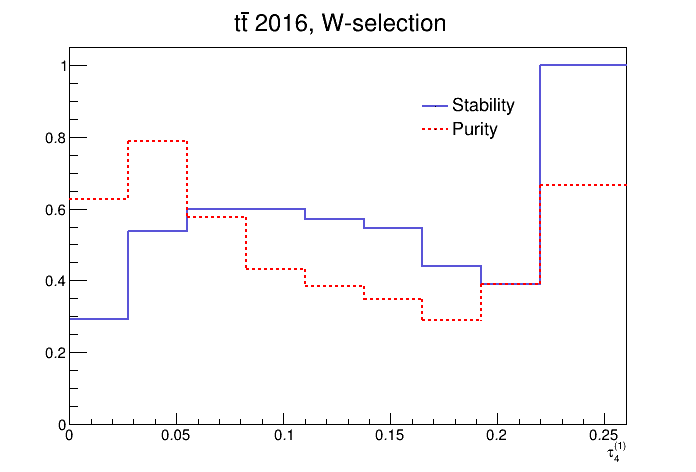

In [164]:
cpse = ROOT.TCanvas("pse_ttbar", "pse_ttbar")

purity.SetLineColor(ROOT.kRed)
purity.SetLineWidth(2)
purity.SetLineStyle(2)
purity.SetMinimum(0.)
purity.SetMaximum(1.05)

stability.SetLineColor(9)
stability.SetLineWidth(2)
stability.SetLineStyle(1)
stability.SetMinimum(0.)
stability.SetMaximum(1.05)
stability.SetTitle("t#bar{t} 2016, W-selection ")
stability.Draw("hist")
purity.Draw("hist same")
#efficiency.Draw("same")

leg0 = ROOT.TLegend(0.6, 0.7, 0.8, 0.8)
leg0.AddEntry( stability, "Stability ")
leg0.AddEntry( purity, "Purity ")
#leg0.AddEntry( histMgenData, "'Truth' (MC: MG5+Pythia8)", 'p')
leg0.SetLineColor(0)
leg0.SetBorderSize(0)
leg0.SetFillStyle(0)

#hs.Add(histMdetMC, "E")
#hs.Add(histMdetData, "E")
#hs.Draw("nostack")
leg0.Draw()

ROOT.gStyle.SetOptStat(0)
cpse.Draw()

(array([[4.070e+02, 2.350e+02, 9.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [8.480e+02, 7.745e+03, 1.221e+03, 2.800e+01, 0.000e+00, 2.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [8.700e+01, 6.007e+03, 9.789e+03, 1.049e+03, 0.000e+00, 4.800e+01,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.600e+01, 3.870e+02, 4.953e+03, 4.512e+03, 0.000e+00, 5.700e+02,
         1.400e+01, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.300e+01, 8.000e+00, 3.580e+02, 1.844e+03, 0.000e+00, 1.511e+03,
         1.850e+02, 1.100e+01, 0.000e+00, 0.000e+00],
        [3.000e+00, 2.000e+00, 1.400e+01, 1.090e+02, 0.000e+00, 4.740e+02,
         3.540e+02, 5.700e+01, 3.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 3.900e+01,
         9.300e+01, 5.

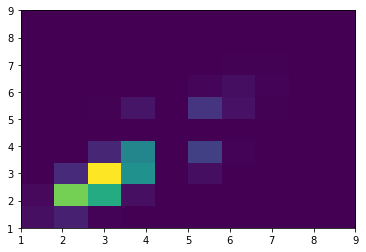

In [165]:
plt.hist2d(x=det_bin_index, y=gen_bin_index)

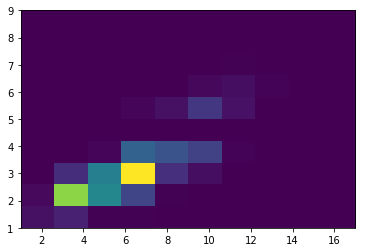

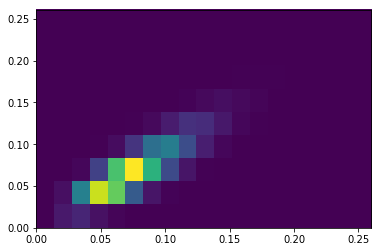

In [166]:
plt.hist2d(x=det_bin_index2, y=gen_bin_index)
plt.show()
plt.hist2d(x=MC_sig_reco_tau4_1, y=MC_sig_gen_tau4_1, bins=[det_bins, gen_bins])
plt.show()

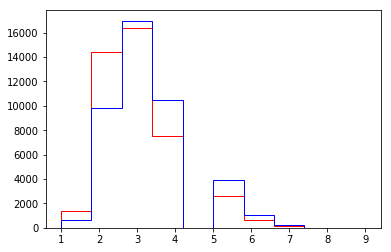

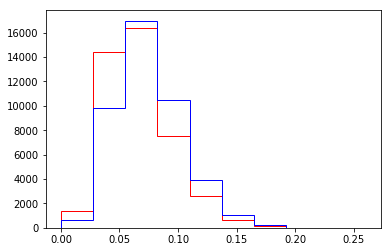

In [167]:
plt.hist(gen_bin_index, histtype='step', color='r')
plt.hist(det_bin_index, histtype='step', color='b')
plt.show()

plt.hist(MC_sig_gen_tau4_1, histtype='step', color='r', bins=gen_bins)
plt.hist(MC_sig_reco_tau4_1, histtype='step', color='b', bins=gen_bins)
plt.show()

### with root

In [168]:
ps_bindex = 0 

l = 1

tot_col = [] #np.array([0. for i in xrange(0, purity.GetNbinsX()+1)]) #
#tot_col_err = [] #0 

tot_row = np.array([0. for i in xrange(1, purity.GetNbinsX()+1)])
#tot_row_err = np.zeros_like([0. for i in xrange(1, purity.GetNbinsX()+1)])

diag = [] #np.zeros_like([0. for i in xrange(1, purity.GetNbinsX()+1)])
#diag_error = [] # np.zeros_like([0. for i in xrange(1, purity.GetNbinsX()+1)])

for i in range(0, response.GetNbinsY()+1):    
    
    k = 0
    col = 0.
    d_jj = 0.
    for j in range(1, response.GetNbinsX()+1):
    
        r_ij = response.GetBinContent(i,j)
        #r_ij_err = response.GetBinError(i,j)
        #print (i,j), r_ij
        
        if (j)%2==0 and j < (response.GetNbinsX()+1):
            #since 2 reco bins per 1 gen bin
            print "Filling row index k={} with elements (i,j)=({},{})".format(k,i,j)
            tot_row[k] += r_ij
            print "Filling row index k={} with elements (i,j)=({},{})".format(k,i,j+1)
            tot_row[k] +=  response.GetBinContent(i,j+1)
            
            #tot_col_err[k] += response.GetBinError(i,j)
            #tot_col_err[k] +=  response.GetBinError(i,j+1)
            
            k +=1
        
        col += r_ij
        
        if l==j:
            print "Adding content (equal to {}) of bin i={}, j={} to Diagonal".format(r_ij, i,j), l
            d_jj += r_ij
 
            print "Adding content (equal to {}) of bin i={}, j={} to Diagonal".format( response.GetBinContent(i,j+1), i,j+1), l
            d_jj += response.GetBinContent(i,j+1)

            diag.append(d_jj)
    l = l+2
    print col, d_jj

Adding content (equal to 0.0) of bin i=0, j=1 to Diagonal 1
Adding content (equal to 0.0) of bin i=0, j=2 to Diagonal 1
Filling row index k=0 with elements (i,j)=(0,2)
Filling row index k=0 with elements (i,j)=(0,3)
Filling row index k=1 with elements (i,j)=(0,4)
Filling row index k=1 with elements (i,j)=(0,5)
Filling row index k=2 with elements (i,j)=(0,6)
Filling row index k=2 with elements (i,j)=(0,7)
Filling row index k=3 with elements (i,j)=(0,8)
Filling row index k=3 with elements (i,j)=(0,9)
Filling row index k=4 with elements (i,j)=(0,10)
Filling row index k=4 with elements (i,j)=(0,11)
Filling row index k=5 with elements (i,j)=(0,12)
Filling row index k=5 with elements (i,j)=(0,13)
Filling row index k=6 with elements (i,j)=(0,14)
Filling row index k=6 with elements (i,j)=(0,15)
Filling row index k=7 with elements (i,j)=(0,16)
Filling row index k=7 with elements (i,j)=(0,17)
Filling row index k=8 with elements (i,j)=(0,18)
Filling row index k=8 with elements (i,j)=(0,19)
0.0 0.

In [169]:
print diag
print tot_row
print diag/tot_row

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[9856.06743635 2714.16568889   21.98392309    0.            0.
    0.            0.            0.            0.        ]
[ 0.  0.  0. nan nan nan nan nan nan]


/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [170]:
purity_reco_binning = [0] 
diag = 0
for i in range(1, response.GetNbinsX()+1):
    for j in range(1, response.GetNbinsY()+1):
        dval = response.GetBinContent(i,j)
        if i==j:
            diag = diag+dval
            print i, j, 
            if i==0 and j==0: purity_reco_binning[0] = dval/
            else: purity_reco_binning.append()
        j = j+2

SyntaxError: invalid syntax (<ipython-input-170-dc72c7765764>, line 9)

### Unfolding 

In [171]:
print 'getting tunfolder:'

orientation = ROOT.TUnfoldDensity.kHistMapOutputHoriz
regMode = ROOT.TUnfoldDensity.kRegModeCurvature
con = ROOT.TUnfoldDensity.kEConstraintNone
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
errmode = ROOT.TUnfoldSys.kSysErrModeMatrix
#tunfolder_MC = ROOT.TUnfoldDensity(response, orientation, regMode, con, mode, "signal", "*[UOb]")
#tunfolder_data = ROOT.TUnfoldDensity(response, orientation, regMode, con, mode, "signal", "*[UOb]")

tunfolder_MC = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)
tunfolder_data = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

getting tunfolder:


Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 18 input bins and 9 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{4}^{(1)}(gen_sig)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #10 (yaxis:#tau_{4}^{(1)}(gen_sig)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSteering=*[UOB]
Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 18 input bins and 9 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{4}^{(1)}(gen_sig)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #10 (yaxis:#tau_{4}^{(1)}(gen_sig)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSteering=*[U

Set the input, a 1D reconstructed histogram from either MC_sig (closure) or Data (measurement) , binned in the detector level binning. Subtract background contributions from data, using reco-MC bkg.

In [172]:
print 'setting reco input'
tunfolder_data.SetInput( histMdetData )
tunfolder_data.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

setting reco input


In [173]:
print 'setting reco MC input'
tunfolder_MC.SetInput( histMdetMC_sig )
#tunfolder_MC.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

setting reco MC input


1

Warning in <TUnfoldDensity::SetInput>: One input bin has zero error, and is ignored.


In [174]:
unfolded_data = tunfolder_data.DoUnfold(0.)
unfolded_data = tunfolder_data.GetOutput("unfolded_data")

unfolded_MC = tunfolder_MC.DoUnfold(0.)
unfolded_MC = tunfolder_MC.GetOutput("unfolded_MC")

Warning in <TROOT::Append>: Replacing existing TH1: unfolded_data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: unfolded_MC (Potential memory leak).


In [175]:
ROOT.gStyle.SetOptStat(0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5
Info in <TCanvas::Print>: png file tau4_1_unfolding_Escheme_bkgsub.png has been created
Info in <TCanvas::Print>: pdf file tau4_1_unfolding_Escheme_bkgsub.pdf has been created


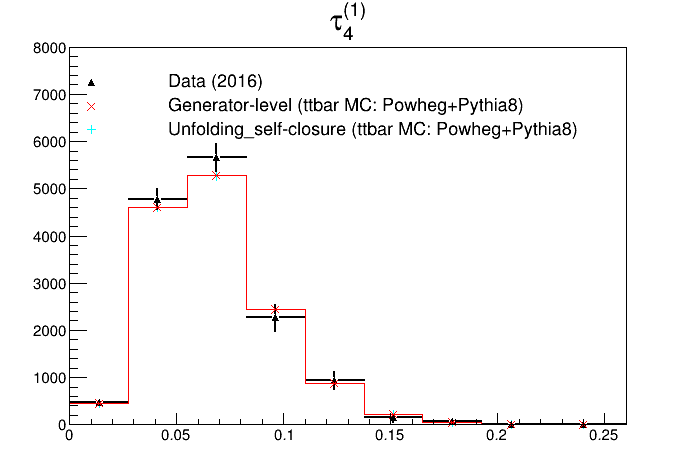

In [176]:
c5 = ROOT.TCanvas('c5', 'c5')

unfolded_MC.SetMarkerStyle(2)
unfolded_MC.SetMarkerColor(7)
unfolded_MC.SetLineColor(7)
unfolded_MC.SetLineWidth(1)

unfolded_data.SetMarkerStyle(22)
unfolded_data.SetMarkerColor(1)
unfolded_data.SetLineColor(1)
unfolded_data.SetLineWidth(2)


#unfolded_MC.SetFillColor(0)
#histMgenData.SetMarkerStyle(4)
#histMgenData.SetMarkerColor(2)
#histMgenData.SetOption("E")
#histMgenData.SetLineColor(2)
histMgenMC_sig.SetMarkerStyle(5)
histMgenMC_sig.SetMarkerColor(2)
histMgenMC_sig.SetLineColor(2)



hs = ROOT.THStack("#tau_{4}^{(1)}", "#tau_{4}^{(1)}")
#hs.Add
#hs.SetMinimum(0)
hs.SetMaximum(8000)
#hs.Add( histMgenData, "E HIST")
hs.Add( unfolded_MC, "E HIST")
hs.Add( unfolded_data, "E ")
hs.Add(histMgenMC_sig, "E HIST")
#hs.Add(histMdetMC_sig, "E")
#hs.Add(histMdetData, "E")

leg0 = ROOT.TLegend(0.02, 0.7, 0.91, 0.85)
leg0.AddEntry( unfolded_data, "Data (2016)", 'p')
leg0.AddEntry( histMgenMC_sig, "Generator-level (ttbar MC: Powheg+Pythia8)", 'p')
#leg0.AddEntry( histMgenData, "'Truth' (MC: MG5+Pythia8)", 'p')
leg0.AddEntry( unfolded_MC, "Unfolding_self-closure (ttbar MC: Powheg+Pythia8)", 'p')
leg0.SetLineColor(0)
leg0.SetBorderSize(0)
leg0.SetFillStyle(0)

#hs.Add(histMdetMC, "E")
#hs.Add(histMdetData, "E")
hs.Draw("nostack")
leg0.Draw()

c5.Draw()
c5.SaveAs("tau4_1_unfolding_Escheme_bkgsub.png")
c5.SaveAs("tau4_1_unfolding_Escheme_bkgsub.pdf")

In [177]:
ratio = ROOT.TH1D("","; #tau_{4}^{(1)}",  gen_bins.shape[0]-1, (gen_bins))
ratio.GetXaxis().SetTitle("#tau_{4}^{(1)}");
#ratio.GetYaxis().SetTitleOffset(0.);
ratio.GetYaxis().CenterTitle(ROOT.kTRUE);
ratio.GetXaxis().CenterTitle(ROOT.kTRUE);
ratio.GetYaxis().SetRangeUser(0.7,1.3)
ratio.Add(unfolded_MC)
ratio.GetYaxis().SetTitle("#frac{Unfolded Powheg}{Gen-level Powheg}")
ratio.Sumw2()
ratio.SetStats(0)
ratio.Divide(histMgenMC_sig);
ratio.GetYaxis().SetLabelSize(0.09)
ratio.GetXaxis().SetLabelSize(0.09)
#ratio.SetMarkerStyle(1)
ratio.SetMarkerColor(ROOT.kRed)
ratio.SetLineColor(ROOT.kRed)
ratio.GetYaxis().SetTitleSize(0.12)
ratio.GetYaxis().SetTitleOffset(0.4)
ratio.GetXaxis().SetTitleSize(0.12)
ratio.GetXaxis().SetTitleOffset(0.85)

print "Bin Content", "\t", "Bin error", "\t", "Bin Center", "\t", "Bin Low-Edge", "\t", "Ratio to Truth for bin", "\t", "Ratio Error"
for i in xrange(1,gen_bins.shape[0]):
    print "%0.4f"%unfolded_MC.GetBinContent(i), "\t", "%0.4f"%unfolded_MC.GetBinError(i), "\t", unfolded_MC.GetBinCenter(i), "\t", unfolded_MC.GetBinLowEdge(i), "%0.4f"%ratio.GetBinContent(i), "%0.4f"%ratio.GetBinError(i)

Bin Content 	Bin error 	Bin Center 	Bin Low-Edge 	Ratio to Truth for bin 	Ratio Error
446.5149 	27.9085 	0.01375 	0.0 1.0000 0.0685
4597.7812 	72.9752 	0.04125 	0.0275 1.0000 0.0181
5277.3677 	94.4921 	0.06875 	0.055 1.0000 0.0197
2451.5209 	84.8156 	0.09625 	0.0825 1.0000 0.0366
864.4771 	60.8278 	0.12375 	0.11 1.0000 0.0732
213.4344 	34.5425 	0.15125 	0.1375 1.0000 0.1670
43.7851 	14.8026 	0.17875 	0.165 1.0000 0.3498
5.5764 	3.3370 	0.20625 	0.1925 1.0000 0.6474
0.6801 	0.6258 	0.24 	0.22 1.0000 1.1609


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c6
Info in <TCanvas::Print>: png file tau_4_1_MC_SC_ratio_Escheme_bkgsub.png has been created
Info in <TCanvas::Print>: pdf file tau_4_1_MC_SC_ratio_Escheme_bkgsub.pdf has been created


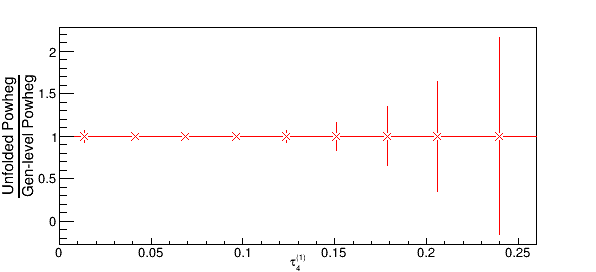

In [178]:
c6 = ROOT.TCanvas("c6","c6", 600,300)
ratio.GetYaxis().SetLabelSize(0.05)
ratio.GetXaxis().SetLabelSize(0.05)
#ratio.SetMarkerStyle(1)
ratio.SetMarkerStyle(5)
ratio.SetMarkerColor(ROOT.kRed)
ratio.SetLineColor(ROOT.kRed)
ratio.GetYaxis().SetTitleSize(0.06)
ratio.GetYaxis().SetTitleOffset(0.7)
ratio.GetXaxis().SetTitleSize(0.05)
ratio.GetXaxis().SetTitleOffset(0.8)
#ratio.SetMinimum(0.7)
#ratio.SetMaximum(1.3)
#ratio.SetMarkerStyle(21);
ratio.Draw("ep")
c6.Draw()
c6.SaveAs("tau_4_1_MC_SC_ratio_Escheme_bkgsub.png")
c6.SaveAs("tau_4_1_MC_SC_ratio_Escheme_bkgsub.pdf")

In [179]:
# get unfolding output
# includes the statistical and background errors
# but not the other systematic uncertainties
#tunfolder_data.SetInput( histMdetData )
tunfolder_data.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

histUnfoldOutput= tunfolder_data.GetOutput("unfolded_data")

# retreive error matrix of statistical errors
histEmatStat=tunfolder_data.GetEmatrixInput("unfolding stat error matrix");
# retreive full error matrix
# This includes all systematic errors
histEmatTotal=tunfolder_data.GetEmatrixTotal("unfolding total error matrix");
# create two copies of the unfolded data, one with statistical errors
# the other with total errors
histUnfoldStat=ROOT.TH1D("tau4_1(unfold,staterr)",";tau4_1(gen)",  gen_bins.shape[0]-1, (gen_bins));
histUnfoldTotal=ROOT.TH1D("tau4_1(unfold,totalerr)",";tau4_1(gen)",  gen_bins.shape[0]-1, (gen_bins));

for i in xrange(0, gen_bins.shape[0]): 
    c=histUnfoldOutput.GetBinContent(i);
    # histogram with unfolded data and stat errors
    histUnfoldStat.SetBinContent(i,c);
    histUnfoldStat.SetBinError(i,np.sqrt(histEmatStat.GetBinContent(i,i)));
    # histogram with unfolded data and total errors
    histUnfoldTotal.SetBinContent(i,c);
    histUnfoldTotal.SetBinError(i,np.sqrt(histEmatTotal.GetBinContent(i,i)));

# create histogram with correlation matrix
histCorr=ROOT.TH2D("Corr(total)",";tau4_1(gen);tau4_1(gen)",  gen_bins.shape[0]-1, (gen_bins), gen_bins.shape[0]-1, (gen_bins));
for i in xrange(0, gen_bins.shape[0]): 
    ei,ej = 0,0
    ei=np.sqrt(histEmatTotal.GetBinContent(i,i));
    if(ei<=0.0): continue
    for j in xrange(0, gen_bins.shape[0]):
        ej=np.sqrt(histEmatTotal.GetBinContent(j,j));
        if(ej<=0.0): continue
        histCorr.SetBinContent(i,j,histEmatTotal.GetBinContent(i,j)/ei/ej);

# retreive bgr source 1
#histdetNormBgr1=tunfolder_data.GetBackground("bgr1 normalized", "background1");
histMdetNormBgrTotal=tunfolder_data.GetBackground("bkg_all");
#========================


Error in <TUnfoldDensity::SubtractBackground>: Source bkg_all given twice, ignoring 2nd call.

Warning in <TROOT::Append>: Replacing existing TH1: unfolded_data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: unfolding stat error matrix (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: unfolding total error matrix (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Corr(total) (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bkg_all (Potential memory leak).


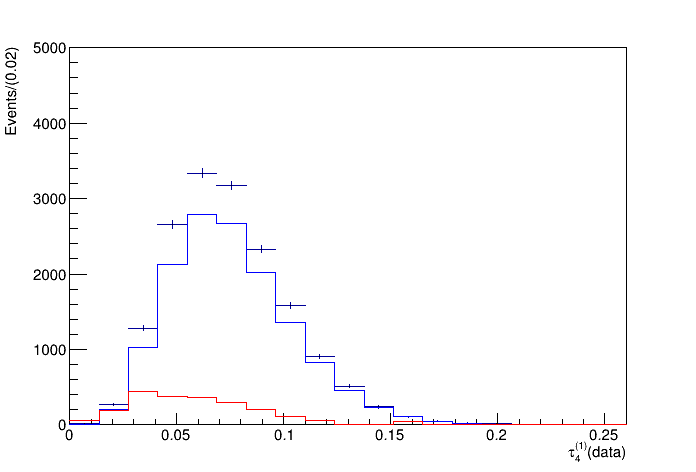

In [180]:
# Step 7: plots
output = ROOT.TCanvas();
#output.Divide(3,2);
#output.cd(1);
# data, MC prediction, background
#histMdetData.SetMinimum(0.0);
histMdetData.SetMaximum(histMdetData.GetMaximum()*1.5);
histMdetData.Draw("E");
#histMdetMC_sig.SetMinimum(0.0);
histMdetMC_sig.SetLineColor(ROOT.kBlue);
histMdetNormBgrTotal.SetLineColor(ROOT.kRed);
#histdetNormBgr1.SetLineColor(ROOT.kCyan);
histMdetMC_sig.Draw("SAME HIST");
#histdetNormBgr1.Draw("SAME HIST");
histMdetNormBgrTotal.Draw("SAME HIST");
output.Draw()

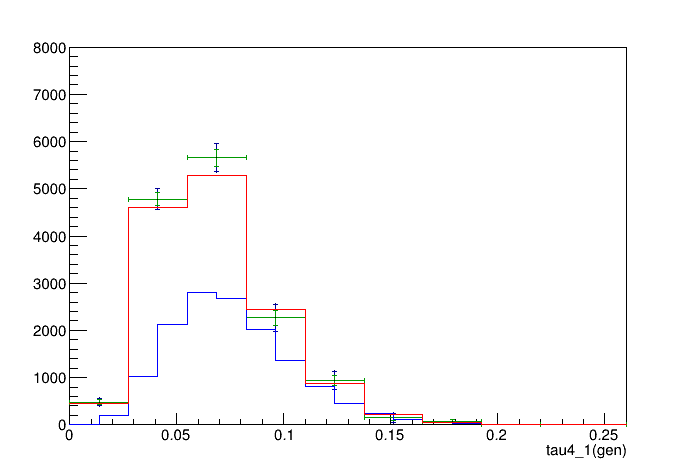

In [182]:
#output.cd(2)
# unfolded data, data truth, MC truth
output = ROOT.TCanvas();
histUnfoldTotal.SetMinimum(0.0);
histUnfoldTotal.SetMaximum(8000);
histUnfoldTotal.SetLineColor(ROOT.kBlue+3)
histUnfoldTotal.SetLineWidth(1)
# outer error: total error
histUnfoldTotal.Draw("E");
# middle error: stat+bgr
histUnfoldOutput.SetLineWidth(1)
histUnfoldOutput.Draw("SAME E1");
# inner error: stat only
histUnfoldStat.SetLineColor(ROOT.kGreen+2)
histUnfoldStat.Draw("SAME E1");

histMdetMC_sig.Draw("SAME HIST");
histMgenMC_sig.Draw("SAME HIST");
#histBbbSignalGen.SetLineColor(ROOT.kBlue);
#histBbbSignalGen.Draw("SAME HIST");
output.Draw()

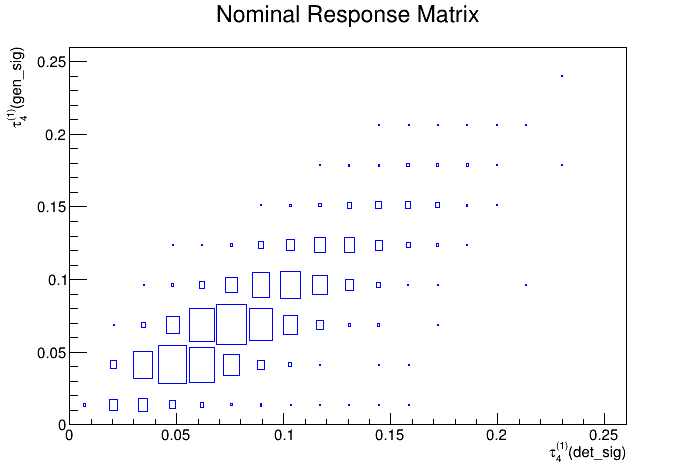

In [183]:
output.cd(3);
# unfolding matrix
response.SetLineColor(ROOT.kBlue);
response.Draw("BOX");

output.Draw()

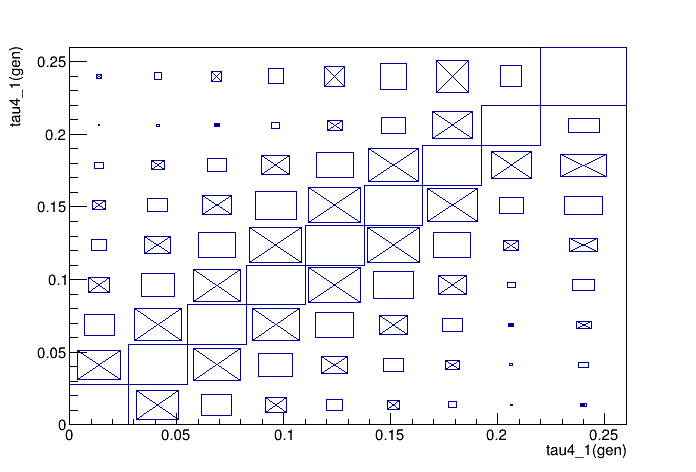

In [184]:
# show tau as a function of chi**2
output.cd(4);
#logTauX.Draw();
#bestLogTauLogChi2.SetMarkerColor(ROOT.kRed);
#bestLogTauLogChi2.Draw("*");
# show the L curve
output.cd(5);
#lCurve.Draw("AL");
#bestLcurve.SetMarkerColor(ROOT.kRed);
#bestLcurve.Draw("*");
# show correlation matrix
output.cd(6);
histCorr.Draw("BOX");
output.Draw()

# $\tau_{4}^{(2)}$ unfolding with background subtraction + purity&stability study [w/ E-scheme recombination+excl. $k_T$ axes]


In [20]:
Wjets_gen_tau4_2 = Wjets_gen_nSub_basis[:,11]

ST1_gen_tau4_2 = ST1_gen_nSub_basis[:,11]

ST2_gen_tau4_2 = ST2_gen_nSub_basis[:,11]

ST3_gen_tau4_2 = ST3_gen_nSub_basis[:,11]

ST4_gen_tau4_2 = ST4_gen_nSub_basis[:,11]

ST5_gen_tau4_2 = ST5_gen_nSub_basis[:,11]

TTbar_gen_tau4_2 = TTbar_gen_nSub_basis[:,11]

In [21]:
Wjets_reco_tau4_2 = Wjets_reco_nSub_basis[:,11]

ST1_reco_tau4_2 = ST1_reco_nSub_basis[:,11]

ST2_reco_tau4_2 = ST2_reco_nSub_basis[:,11]

ST3_reco_tau4_2 = ST3_reco_nSub_basis[:,11]

ST4_reco_tau4_2 = ST4_reco_nSub_basis[:,11]

ST5_reco_tau4_2 = ST5_reco_nSub_basis[:,11]

TTbar_reco_tau4_2 = TTbar_reco_nSub_basis[:,11]

# Unfolding $\tau_{4}^{(2)}$ with background subtraction

In [22]:
MC_sig_reco_tau4_2 = TTbar_reco_tau4_2
MC_sig_gen_tau4_2 = TTbar_gen_tau4_2

MC_bkg_reco_tau4_2 = np.concatenate((ST1_reco_tau4_2,ST2_reco_tau4_2,ST3_reco_tau4_2,ST4_reco_tau4_2,ST5_reco_tau4_2,Wjets_reco_tau4_2))
MC_bkg_gen_tau4_2 = np.concatenate((ST1_gen_tau4_2,ST2_gen_tau4_2,ST3_gen_tau4_2,ST4_gen_tau4_2,ST5_gen_tau4_2,Wjets_gen_tau4_2))

data_tau4_2 = data_nSub_basis[:,11]
weights_MC_sig = weight_TTbar
weights_MC_bkg = np.concatenate((weight_ST1,weight_ST2,weight_ST3,weight_ST4,weight_ST5,weight_Wjets))

Get the response matrix and input 1D distributions for unfolding.

In [23]:
print np.min(MC_sig_gen_tau4_2)
print np.min(MC_sig_reco_tau4_2)
print np.max(MC_sig_gen_tau4_2)
print np.max(MC_sig_reco_tau4_2), "\n"


print np.min(MC_bkg_gen_tau4_2)
print np.min(MC_bkg_reco_tau4_2)
print np.max(MC_bkg_gen_tau4_2)
print np.max(MC_bkg_reco_tau4_2), "\n"


print np.min(data_tau4_2)
print np.max(data_tau4_2)

4.965249900124036e-06
0.0003161522326990962
0.08010974526405334
0.08668656647205353 

0.00040877447463572025
0.0007921340875327587
0.0676879957318306
0.0668683722615242 

0.0007059933268465102
0.1088307648897171


#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

In [72]:
gen_bins = np.array([x for x in np.linspace(num=5, start=0., stop=0.03)])
gen_bins = np.concatenate((gen_bins, np.array([0.04, 0.055, 0.075,  0.11])))
print gen_bins, gen_bins.shape[0]

det_bins = np.array([x for x in np.linspace(num=9, start=0., stop=0.03)])
det_bins = np.concatenate((det_bins, np.array([0.035, 0.04, 0.0475, 0.055, 0.0625, 0.075, 0.0925, 0.11])))
print det_bins, det_bins.shape[0]

[0.     0.0075 0.015  0.0225 0.03   0.04   0.055  0.075  0.11  ] 9
[0.      0.00375 0.0075  0.01125 0.015   0.01875 0.0225  0.02625 0.03
 0.035   0.04    0.0475  0.055   0.0625  0.075   0.0925  0.11   ] 17


In [73]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

#### Fill histograms for sig and bkg. MC separately in this case (as one should!)

In [74]:
histMgenMC_bkg = ROOT.TH1D("histMgenMC_bkg", "histMgenMC_bkg; #tau_{4}^{(2)}; Events/(0.02)",  gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenMC_bkg, MC_bkg_gen_tau4_2, weights=weights_MC_bkg)

histMdetMC_bkg = ROOT.TH1D("histMdetMC_bkg", "histMdetMC_bkg; #tau_{4}^{(2)}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetMC_bkg, MC_bkg_reco_tau4_2, weights=weights_MC_bkg)

histMgenMC_sig = ROOT.TH1D("histMgenMC_sig", "histMgenMC_sig; #tau_{4}^{(2)}; Events/(0.02)",  gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenMC_sig, MC_sig_gen_tau4_2, weights=weights_MC_sig)

histMdetMC_sig = ROOT.TH1D("histMdetMC_sig", "histMdetMC_sig; #tau_{4}^{(2)}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetMC_sig, MC_sig_reco_tau4_2, weights=weights_MC_sig)

#histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{4}^{(2)}; Events/(0.02)", gen_bins.shape[0]-1, (gen_bins))
#fill_hist(histMgenData, TTbartruth_nSub_basis[:,4]/TTbartruth_nSub_basis[:,2])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{4}^{(2)}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetData, data_tau4_2)

Warning in <TROOT::Append>: Replacing existing TH1: histMgenMC_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetMC_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMgenMC_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetMC_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetData (Potential memory leak).


Set the X and Y axis labels

In [75]:
histMgenMC_bkg.SetTitle(";#tau_{4}^{(2)}(gen_bkg)")

histMdetMC_bkg.SetTitle(";#tau_{4}^{(2)}(det_bkg)")

histMgenMC_sig.SetTitle(";#tau_{4}^{(2)}(gen_sig)")

histMdetMC_sig.SetTitle(";#tau_{4}^{(2)}(det_sig)")

histMdetData.SetTitle(";#tau_{4}^{(2)}(data)")


Draw the variables at reco and gen level and for "data"

Warning in <TCanvas::Constructor>: Deleting canvas with same name: chistMgenMC_sig1


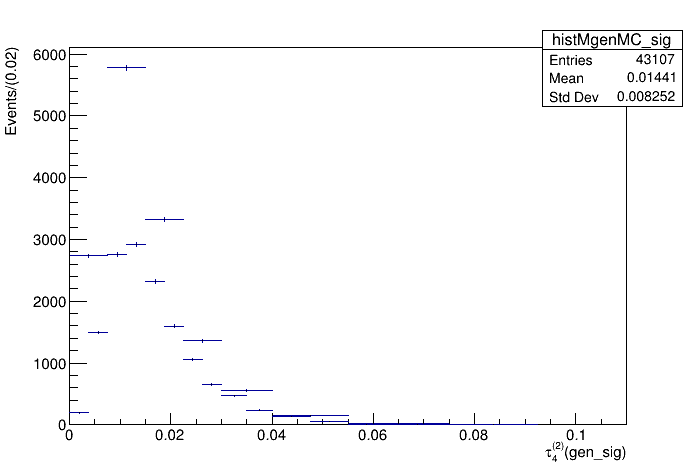

In [76]:
c1 = ROOT.TCanvas("chistMgenMC_sig1", "chistMgenMC_sig1")
histMgenMC_sig.Draw("e")
histMdetMC_sig.Draw("e same")
c1.Draw()

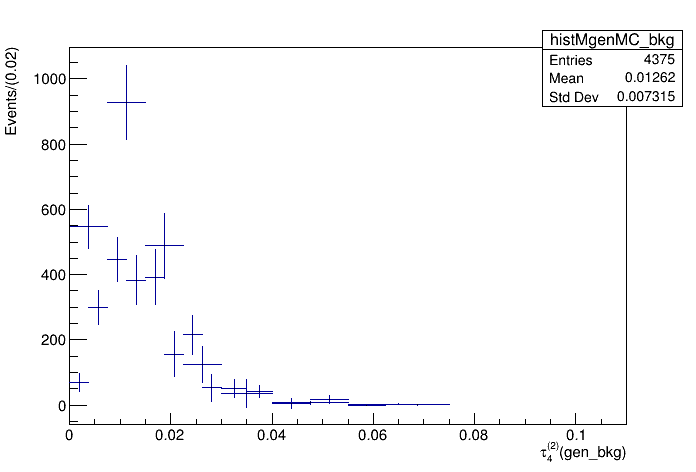

In [77]:
c1 = ROOT.TCanvas("chistMgenMC_bkg1", "chistMgenMC_bkg1")
histMgenMC_bkg.Draw("e")
histMdetMC_bkg.Draw("e same")
c1.Draw()

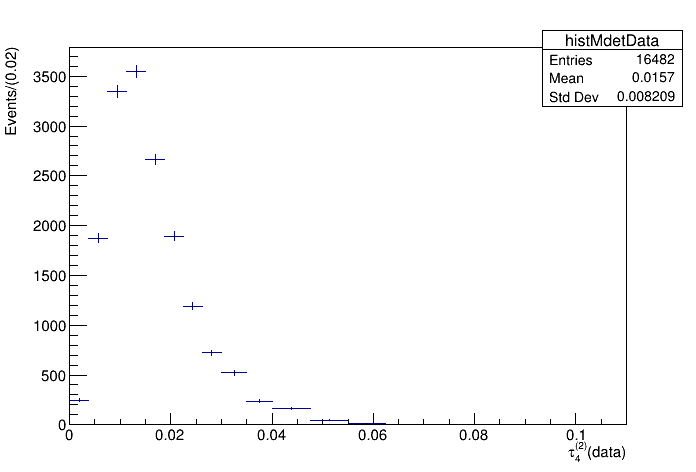

In [78]:
c1 = ROOT.TCanvas("chistMgenMC_sig1", "chistMgenMC_sig1")
#histMgenData.Draw("e")
histMdetData.Draw("e ")
c1.Draw()

### Fill response matrix

In [79]:
response = ROOT.TH2D('response', 'response', det_bins.shape[0]-1, det_bins, gen_bins.shape[0]-1, gen_bins)
hist2Dfill = np.zeros((MC_sig_reco_tau4_2.shape[0], 2))
hist2Dfill[:,0] = MC_sig_reco_tau4_2.flatten()
hist2Dfill[:,1] = MC_sig_gen_tau4_2.flatten()
fill_hist(response, hist2Dfill, weights_MC_sig)
response.SetTitle("Nominal Response Matrix;#tau_{4}^{(2)}(det_sig);#tau_{4}^{(2)}(gen_sig)")

Warning in <TROOT::Append>: Replacing existing TH1: response (Potential memory leak).


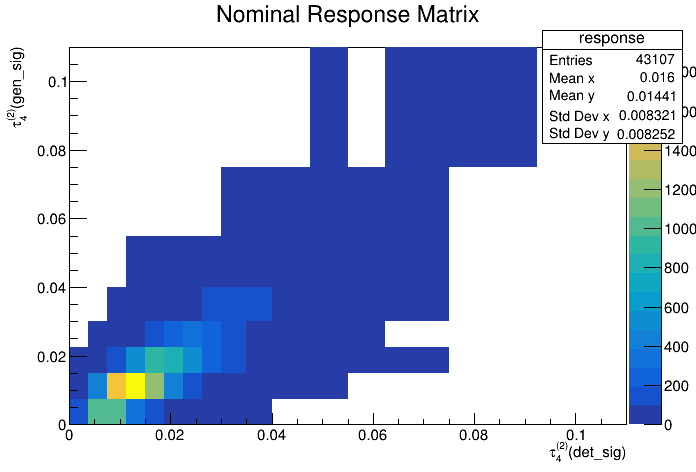

In [80]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

### Purity and Stability calculation

In [81]:
hMC_gen_bkg = ROOT.TH1D(histMgenMC_bkg)
#hMC_gen_bkg.Scale(1./norm_genMC_bkg)

hMC_reco_bkg = ROOT.TH1D(histMdetMC_bkg)
#hMC_reco_bkg.Scale(1./norm_recoMC_bkg)

hMC_gen_sig = ROOT.TH1D(histMgenMC_sig)
#hMC_gen_sig.Scale(1./norm_genMC_sig)

hMC_reco_sig = ROOT.TH1D(histMdetMC_sig)
#hMC_reco_sig.Scale(1./norm_recoMC_sig)

hMC_data = ROOT.TH1D(histMdetData)
#histMgenData.Scale(1./norm_genData)
#histMdetData.Scale(1./norm_detData)

'''
histMgenMC_bkg.Scale(1./norm_genMC_bkg)
histMdetMC_bkg.Scale(1./norm_recoMC_bkg)
histMgenMC_sig.Scale(1./norm_genMC_sig)
histMdetMC_sig.Scale(1./norm_recoMC_sig)

#histMgenData.Scale(1./norm_genData)
histMdetData.Scale(1./norm_detData)
''';

In [82]:
for i in xrange(0, histMdetMC_sig.GetNbinsX()+1):
    print i, hMC_reco_sig.GetBinLowEdge(i), hMC_reco_sig.GetBinContent(i)   
print "=========="
for i in xrange(0, hMC_gen_sig.GetNbinsX()+1):
    print i, hMC_gen_sig.GetBinLowEdge(i), hMC_gen_sig.GetBinContent(i)

0 -0.006875 0.0
1 0.0 196.470304012
2 0.00375 1494.29146488
3 0.0075 2764.10836769
4 0.01125 2920.17541278
5 0.015 2316.45681883
6 0.01875 1597.99846414
7 0.0225 1054.54632003
8 0.02625 651.832575905
9 0.03 466.8199815
10 0.035 233.574596469
11 0.04 139.835908831
12 0.0475 52.1306186174
13 0.055 8.8632281129
14 0.0625 3.67787783443
15 0.075 0.355689677515
16 0.0925 0.0
0 -0.01375 0.0
1 0.0 2733.18209157
2 0.0075 5777.66640369
3 0.015 3322.00521821
4 0.0225 1357.23428723
5 0.03 551.017809249
6 0.04 143.767898871
7 0.055 15.3747379314
8 0.075 0.889182559198


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cresponse1


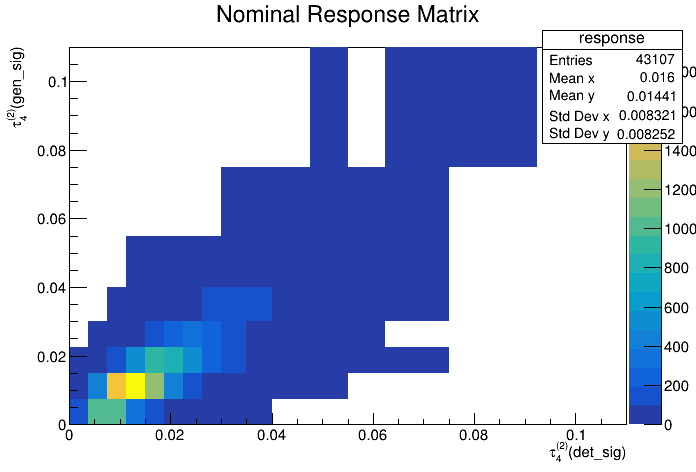

In [83]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

In [84]:
purity = ROOT.TH1D("purity", "Purity and stability study; #tau_{4}^{(2)}; ",  gen_bins.shape[0]-1, (gen_bins))
stability = ROOT.TH1D("stability", "Purity and stability study; #tau_{4}^{(2)}; ",  gen_bins.shape[0]-1, (gen_bins))
efficiency = ROOT.TH1D("efficiency", "Purity and stability study; #tau_{4}^{(2)}; ",  gen_bins.shape[0]-1, (gen_bins))

### With python

We define purity as the fraction of reconstructed events that are generated in the same bin, 
and stability as the fraction of generated events that are reconstructed in the same
bin, divided by the overall reconstruction efficiency per bin. 

In [85]:
gen_arr = MC_sig_gen_tau4_2[:]
#print gen_arr[0:20]
#print gen_bins[0:-1]
gen_bin_index = np.digitize(gen_arr, gen_bins)
print gen_bin_index
#print gen_bin_index[0:20]

det_arr = MC_sig_reco_tau4_2[0:]
#print det_arr[0:20]
#print det_bins[0:-1]
det_bin_index = np.digitize(det_arr, gen_bins)
det_bin_index2 = np.digitize(det_arr, det_bins)
#print det_bin_index[0:20]

ndet_pergenbin = [0.] #N_recgen array = number of events generated in and reconstructed in gen bin i
ndet_genanywhere = [0.] # number of events reconstructed in gen _bin i but generated anywhere
ngen_detanywhere = [0.] # number of events generated in gen _bin i but reconstructed anywhere

### purity = # of evts generated and reconstructed in gen bin i / # of evts reconstructed in gen bin i but generated anywhere
### stability = # of evts generated and reconstructed in gen bin / # of evts generated in gen bin i but reconstructed anywhere
for i in xrange(0, gen_bins.shape[0]-1):
    
    #print i+1
    
    for k in xrange(0, gen_bin_index.shape[0]):
        
        if gen_bin_index[k]==i+1: 
            ngen_detanywhere[i]+=1 #stability denominator
            if det_bin_index[k]==i+1: ndet_pergenbin[i]+=1
            
    ngen_detanywhere.append(0.)
    ndet_pergenbin.append(0.)
    
    for k in xrange(0, det_bin_index.shape[0]):
        
        if det_bin_index[k]==i+1: 
            ndet_genanywhere[i]+=1 #purity denominator
            
    ndet_genanywhere.append(0.)
    
    print "Setting contents for P, S, eff. histos, in bin %d"%(i+1)
    purity.SetBinContent(i+1, ndet_pergenbin[i]/ndet_genanywhere[i])
    stability.SetBinContent(i+1, ndet_pergenbin[i]/ngen_detanywhere[i])
    efficiency.SetBinContent(i+1, ndet_pergenbin[i]/43107.)
    
    
ndet_pergenbin = np.array(ndet_pergenbin)
ndet_genanywhere = np.array(ndet_genanywhere)
ngen_detanywhere = np.array(ngen_detanywhere)

print "\n\n+++++++++Pure and Stable! :)+++++++++++++\n\n"
print ndet_pergenbin,"\n"
print ndet_genanywhere,"\n"
purity_arr = ndet_pergenbin/ndet_genanywhere
print "Purity array:", purity_arr[:-1], "\n\n"

print ndet_pergenbin,"\n"
print ngen_detanywhere,"\n"
stability_arr = ndet_pergenbin/ngen_detanywhere
print "Stability array:", stability_arr[:-1], "\n\n"

print "+++++Efficiency+++++\n"
efficiency_arr = ndet_pergenbin/np.sum(ngen_detanywhere)
print "Efficiency array:", efficiency_arr[:-1]

[2 2 3 ... 2 1 4]
Setting contents for P, S, eff. histos, in bin 1
Setting contents for P, S, eff. histos, in bin 2
Setting contents for P, S, eff. histos, in bin 3
Setting contents for P, S, eff. histos, in bin 4
Setting contents for P, S, eff. histos, in bin 5
Setting contents for P, S, eff. histos, in bin 6
Setting contents for P, S, eff. histos, in bin 7
Setting contents for P, S, eff. histos, in bin 8


+++++++++Pure and Stable! :)+++++++++++++


[3.8180e+03 1.0954e+04 5.2810e+03 1.8250e+03 7.3500e+02 2.1200e+02
 1.0000e+01 1.0000e+00 0.0000e+00] 

[5.2540e+03 1.7688e+04 1.2110e+04 5.2830e+03 2.1420e+03 5.8900e+02
 4.0000e+01 1.0000e+00 0.0000e+00] 

Purity array: [0.72668443 0.61928991 0.43608588 0.34544766 0.34313725 0.35993209
 0.25       1.        ] 


[3.8180e+03 1.0954e+04 5.2810e+03 1.8250e+03 7.3500e+02 2.1200e+02
 1.0000e+01 1.0000e+00 0.0000e+00] 

[8.4900e+03 1.8010e+04 1.0249e+04 4.1710e+03 1.6930e+03 4.4600e+02
 4.5000e+01 3.0000e+00 0.0000e+00] 

Stability array: [0.

/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in divide
/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in divide


In [86]:
ROOT.gStyle.SetOptStat(0)

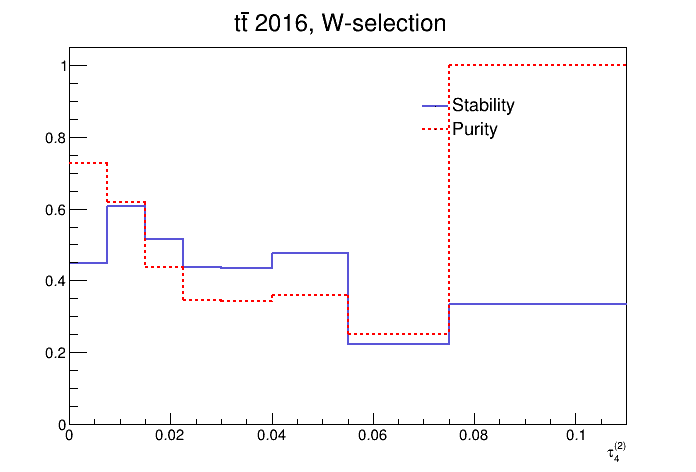

In [87]:
cpse = ROOT.TCanvas("pse_ttbar", "pse_ttbar")

purity.SetLineColor(ROOT.kRed)
purity.SetLineWidth(2)
purity.SetLineStyle(2)
purity.SetMinimum(0.)
purity.SetMaximum(1.05)

stability.SetLineColor(9)
stability.SetLineWidth(2)
stability.SetLineStyle(1)
stability.SetMinimum(0.)
stability.SetMaximum(1.05)
stability.SetTitle("t#bar{t} 2016, W-selection ")
stability.Draw("hist")
purity.Draw("hist same")
#efficiency.Draw("same")

leg0 = ROOT.TLegend(0.6, 0.7, 0.8, 0.8)
leg0.AddEntry( stability, "Stability ")
leg0.AddEntry( purity, "Purity ")
#leg0.AddEntry( histMgenData, "'Truth' (MC: MG5+Pythia8)", 'p')
leg0.SetLineColor(0)
leg0.SetBorderSize(0)
leg0.SetFillStyle(0)

#hs.Add(histMdetMC, "E")
#hs.Add(histMdetData, "E")
#hs.Draw("nostack")
leg0.Draw()

ROOT.gStyle.SetOptStat(0)
cpse.Draw()

(array([[3.8180e+03, 1.3490e+03, 8.4000e+01, 0.0000e+00, 3.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [4.2330e+03, 1.0954e+04, 2.2490e+03, 0.0000e+00, 2.2700e+02,
         2.1000e+01, 0.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.9300e+02, 5.0170e+03, 5.2810e+03, 0.0000e+00, 1.2480e+03,
         1.6000e+02, 0.0000e+00, 1.1000e+01, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.7000e+01, 6.3000e+02, 2.2080e+03, 0.0000e+00, 1.8250e+03,
         5.3700e+02, 0.0000e+00, 4.6000e+01, 0.0000e+00, 0.0000e+00],
        [9.0000e+00, 5.5000e+01, 3.9900e+02, 0.0000e+00, 7.7700e+02,
         7.3500e+02, 0.0000e+00, 1.5600e+02, 1.1000e+01, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 5.0000

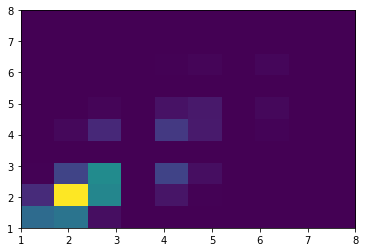

In [88]:
plt.hist2d(x=det_bin_index, y=gen_bin_index)

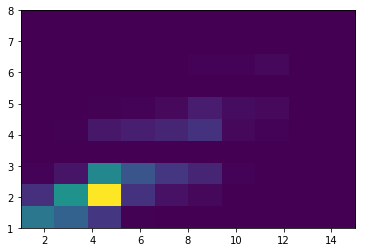

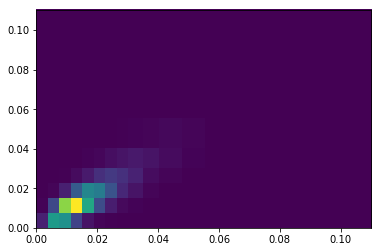

In [89]:
plt.hist2d(x=det_bin_index2, y=gen_bin_index)
plt.show()
plt.hist2d(x=MC_sig_reco_tau4_2, y=MC_sig_gen_tau4_2, bins=[det_bins, gen_bins])
plt.show()

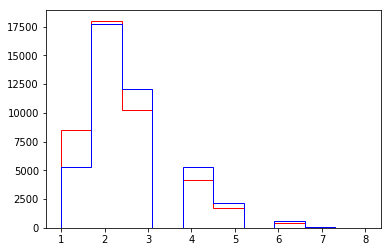

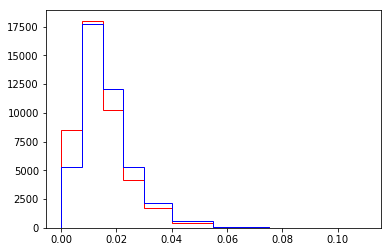

In [90]:
plt.hist(gen_bin_index, histtype='step', color='r')
plt.hist(det_bin_index, histtype='step', color='b')
plt.show()

plt.hist(MC_sig_gen_tau4_2, histtype='step', color='r', bins=gen_bins)
plt.hist(MC_sig_reco_tau4_2, histtype='step', color='b', bins=gen_bins)
plt.show()

### with root

In [91]:
ps_bindex = 0 

l = 1

tot_col = [] #np.array([0. for i in xrange(0, purity.GetNbinsX()+1)]) #
#tot_col_err = [] #0 

tot_row = np.array([0. for i in xrange(1, purity.GetNbinsX()+1)])
#tot_row_err = np.zeros_like([0. for i in xrange(1, purity.GetNbinsX()+1)])

diag = [] #np.zeros_like([0. for i in xrange(1, purity.GetNbinsX()+1)])
#diag_error = [] # np.zeros_like([0. for i in xrange(1, purity.GetNbinsX()+1)])

for i in range(0, response.GetNbinsY()+1):    
    
    k = 0
    col = 0.
    d_jj = 0.
    for j in range(1, response.GetNbinsX()+1):
    
        r_ij = response.GetBinContent(i,j)
        #r_ij_err = response.GetBinError(i,j)
        #print (i,j), r_ij
        
        if (j)%2==0 and j < (response.GetNbinsX()+1):
            #since 2 reco bins per 1 gen bin
            print "Filling row index k={} with elements (i,j)=({},{})".format(k,i,j)
            tot_row[k] += r_ij
            print "Filling row index k={} with elements (i,j)=({},{})".format(k,i,j+1)
            tot_row[k] +=  response.GetBinContent(i,j+1)
            
            #tot_col_err[k] += response.GetBinError(i,j)
            #tot_col_err[k] +=  response.GetBinError(i,j+1)
            
            k +=1
        
        col += r_ij
        
        if l==j:
            print "Adding content (equal to {}) of bin i={}, j={} to Diagonal".format(r_ij, i,j), l
            d_jj += r_ij
 
            print "Adding content (equal to {}) of bin i={}, j={} to Diagonal".format( response.GetBinContent(i,j+1), i,j+1), l
            d_jj += response.GetBinContent(i,j+1)

            diag.append(d_jj)
    l = l+2
    print col, d_jj

Adding content (equal to 0.0) of bin i=0, j=1 to Diagonal 1
Adding content (equal to 0.0) of bin i=0, j=2 to Diagonal 1
Filling row index k=0 with elements (i,j)=(0,2)
Filling row index k=0 with elements (i,j)=(0,3)
Filling row index k=1 with elements (i,j)=(0,4)
Filling row index k=1 with elements (i,j)=(0,5)
Filling row index k=2 with elements (i,j)=(0,6)
Filling row index k=2 with elements (i,j)=(0,7)
Filling row index k=3 with elements (i,j)=(0,8)
Filling row index k=3 with elements (i,j)=(0,9)
Filling row index k=4 with elements (i,j)=(0,10)
Filling row index k=4 with elements (i,j)=(0,11)
Filling row index k=5 with elements (i,j)=(0,12)
Filling row index k=5 with elements (i,j)=(0,13)
Filling row index k=6 with elements (i,j)=(0,14)
Filling row index k=6 with elements (i,j)=(0,15)
Filling row index k=7 with elements (i,j)=(0,16)
Filling row index k=7 with elements (i,j)=(0,17)
0.0 0.0
Filling row index k=0 with elements (i,j)=(1,2)
Filling row index k=0 with elements (i,j)=(1,3)


In [92]:
print diag
print tot_row
print diag/tot_row

/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


[0.0, 0.747414821628389, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[8944.10934432 1301.75572098   19.47314054    0.            0.
    0.            0.            0.        ]
[0.         0.00057416 0.                nan        nan        nan
        nan        nan]


In [93]:
purity_reco_binning = [0] 
diag = 0
for i in range(1, response.GetNbinsX()+1):
    for j in range(1, response.GetNbinsY()+1):
        dval = response.GetBinContent(i,j)
        if i==j:
            diag = diag+dval
            print i, j, 
            if i==0 and j==0: purity_reco_binning[0] = dval/
            else: purity_reco_binning.append()
        j = j+2

SyntaxError: invalid syntax (<ipython-input-93-dc72c7765764>, line 9)

### Unfolding 

In [94]:
print 'getting tunfolder:'

orientation = ROOT.TUnfoldDensity.kHistMapOutputHoriz
regMode = ROOT.TUnfoldDensity.kRegModeCurvature
con = ROOT.TUnfoldDensity.kEConstraintNone
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
errmode = ROOT.TUnfoldSys.kSysErrModeMatrix
#tunfolder_MC = ROOT.TUnfoldDensity(response, orientation, regMode, con, mode, "signal", "*[UOb]")
#tunfolder_data = ROOT.TUnfoldDensity(response, orientation, regMode, con, mode, "signal", "*[UOb]")

tunfolder_MC = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)
tunfolder_data = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

getting tunfolder:


Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 16 input bins and 8 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{4}^{(2)}(gen_sig)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #9 (yaxis:#tau_{4}^{(2)}(gen_sig)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSteering=*[UOB]
Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 16 input bins and 8 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{4}^{(2)}(gen_sig)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #9 (yaxis:#tau_{4}^{(2)}(gen_sig)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSteering=*[UOB

Set the input, a 1D reconstructed histogram from either MC_sig (closure) or Data (measurement) , binned in the detector level binning. Subtract background contributions from data, using reco-MC bkg.

In [95]:
print 'setting reco input'
tunfolder_data.SetInput( histMdetData )
tunfolder_data.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

setting reco input


In [96]:
print 'setting reco MC input'
tunfolder_MC.SetInput( histMdetMC_sig )
#tunfolder_MC.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

setting reco MC input


1

Warning in <TUnfoldDensity::SetInput>: One input bin has zero error, and is ignored.


In [97]:
unfolded_data = tunfolder_data.DoUnfold(0.)
unfolded_data = tunfolder_data.GetOutput("unfolded_data")

unfolded_MC = tunfolder_MC.DoUnfold(0.)
unfolded_MC = tunfolder_MC.GetOutput("unfolded_MC")

In [98]:
ROOT.gStyle.SetOptStat(0)

Info in <TCanvas::Print>: png file tau4_2_unfolding_Escheme_bkgsub.png has been created
Info in <TCanvas::Print>: pdf file tau4_2_unfolding_Escheme_bkgsub.pdf has been created


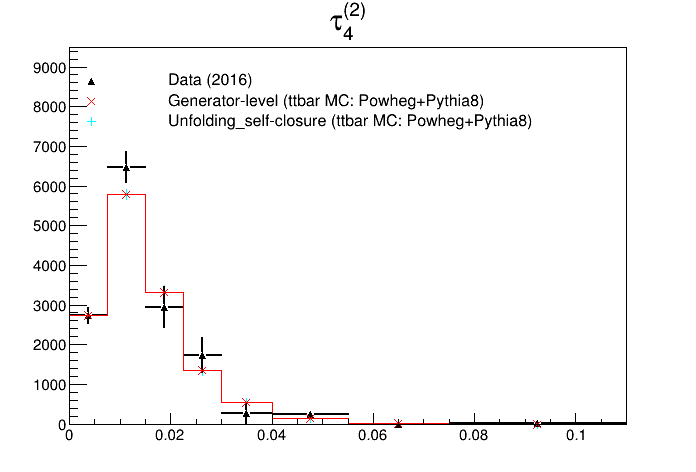

In [99]:
c5 = ROOT.TCanvas('c5', 'c5')

unfolded_MC.SetMarkerStyle(2)
unfolded_MC.SetMarkerColor(7)
unfolded_MC.SetLineColor(7)
unfolded_MC.SetLineWidth(1)

unfolded_data.SetMarkerStyle(22)
unfolded_data.SetMarkerColor(1)
unfolded_data.SetLineColor(1)
unfolded_data.SetLineWidth(2)


#unfolded_MC.SetFillColor(0)
#histMgenData.SetMarkerStyle(4)
#histMgenData.SetMarkerColor(2)
#histMgenData.SetOption("E")
#histMgenData.SetLineColor(2)
histMgenMC_sig.SetMarkerStyle(5)
histMgenMC_sig.SetMarkerColor(2)
histMgenMC_sig.SetLineColor(2)



hs = ROOT.THStack("#tau_{4}^{(2)}", "#tau_{4}^{(2)}")
#hs.Add
#hs.SetMinimum(0)
hs.SetMaximum(9500)
#hs.Add( histMgenData, "E HIST")
hs.Add( unfolded_MC, "E HIST")
hs.Add( unfolded_data, "E ")
hs.Add(histMgenMC_sig, "E HIST")
#hs.Add(histMdetMC_sig, "E")
#hs.Add(histMdetData, "E")

leg0 = ROOT.TLegend(0.02, 0.72, 0.91, 0.85)
leg0.AddEntry( unfolded_data, "Data (2016)", 'p')
leg0.AddEntry( histMgenMC_sig, "Generator-level (ttbar MC: Powheg+Pythia8)", 'p')
#leg0.AddEntry( histMgenData, "'Truth' (MC: MG5+Pythia8)", 'p')
leg0.AddEntry( unfolded_MC, "Unfolding_self-closure (ttbar MC: Powheg+Pythia8)", 'p')
leg0.SetLineColor(0)
leg0.SetBorderSize(0)
leg0.SetFillStyle(0)

#hs.Add(histMdetMC, "E")
#hs.Add(histMdetData, "E")
hs.Draw("nostack")
leg0.Draw()

c5.Draw()
c5.SaveAs("tau4_2_unfolding_Escheme_bkgsub.png")
c5.SaveAs("tau4_2_unfolding_Escheme_bkgsub.pdf")

In [100]:
ratio = ROOT.TH1D("","; #tau_{4}^{(2)}",  gen_bins.shape[0]-1, (gen_bins))
ratio.GetXaxis().SetTitle("#tau_{4}^{(2)}");
#ratio.GetYaxis().SetTitleOffset(0.);
ratio.GetYaxis().CenterTitle(ROOT.kTRUE);
ratio.GetXaxis().CenterTitle(ROOT.kTRUE);
ratio.GetYaxis().SetRangeUser(0.7,1.3)
ratio.Add(unfolded_MC)
ratio.GetYaxis().SetTitle("#frac{Unfolded Powheg}{Gen-level Powheg}")
ratio.Sumw2()
ratio.SetStats(0)
ratio.Divide(histMgenMC_sig);
ratio.GetYaxis().SetLabelSize(0.09)
ratio.GetXaxis().SetLabelSize(0.09)
#ratio.SetMarkerStyle(1)
ratio.SetMarkerColor(ROOT.kRed)
ratio.SetLineColor(ROOT.kRed)
ratio.GetYaxis().SetTitleSize(0.12)
ratio.GetYaxis().SetTitleOffset(0.4)
ratio.GetXaxis().SetTitleSize(0.12)
ratio.GetXaxis().SetTitleOffset(0.85)

print "Bin Content", "\t", "Bin error", "\t", "Bin Center", "\t", "Bin Low-Edge", "\t", "Ratio to Truth for bin", "\t", "Ratio Error"
for i in xrange(1,gen_bins.shape[0]):
    print "%0.4f"%unfolded_MC.GetBinContent(i), "\t", "%0.4f"%unfolded_MC.GetBinError(i), "\t", unfolded_MC.GetBinCenter(i), "\t", unfolded_MC.GetBinLowEdge(i), "%0.4f"%ratio.GetBinContent(i), "%0.4f"%ratio.GetBinError(i)

Bin Content 	Bin error 	Bin Center 	Bin Low-Edge 	Ratio to Truth for bin 	Ratio Error
2733.1821 	61.4804 	0.00375 	0.0 1.0000 0.0252
5777.6664 	127.2213 	0.01125 	0.0075 1.0000 0.0234
3322.0052 	160.2298 	0.01875 	0.015 1.0000 0.0493
1357.2343 	143.0063 	0.02625 	0.0225 1.0000 0.1066
551.0178 	86.0148 	0.035 	0.03 1.0000 0.1581
143.7679 	35.6320 	0.0475 	0.04 1.0000 0.2528
15.3747 	11.2772 	0.065 	0.055 1.0000 0.7488
0.8892 	0.8827 	0.0925 	0.075 1.0000 1.1549


Info in <TCanvas::Print>: png file tau_4_2_MC_SC_ratio_Escheme_bkgsub.png has been created
Info in <TCanvas::Print>: pdf file tau_4_2_MC_SC_ratio_Escheme_bkgsub.pdf has been created


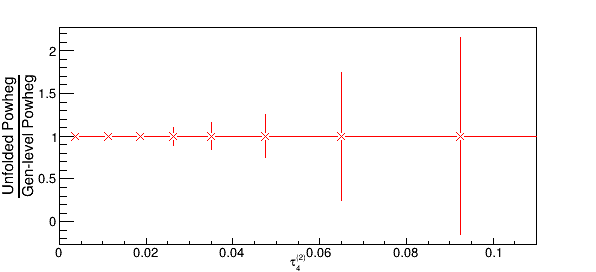

In [101]:
c6 = ROOT.TCanvas("c6","c6", 600,300)
ratio.GetYaxis().SetLabelSize(0.05)
ratio.GetXaxis().SetLabelSize(0.05)
#ratio.SetMarkerStyle(1)
ratio.SetMarkerStyle(5)
ratio.SetMarkerColor(ROOT.kRed)
ratio.SetLineColor(ROOT.kRed)
ratio.GetYaxis().SetTitleSize(0.06)
ratio.GetYaxis().SetTitleOffset(0.7)
ratio.GetXaxis().SetTitleSize(0.05)
ratio.GetXaxis().SetTitleOffset(0.8)
#ratio.SetMinimum(0.7)
#ratio.SetMaximum(1.3)
#ratio.SetMarkerStyle(21);
ratio.Draw("ep")
c6.Draw()
c6.SaveAs("tau_4_2_MC_SC_ratio_Escheme_bkgsub.png")
c6.SaveAs("tau_4_2_MC_SC_ratio_Escheme_bkgsub.pdf")

In [102]:
# get unfolding output
# includes the statistical and background errors
# but not the other systematic uncertainties
#tunfolder_data.SetInput( histMdetData )
tunfolder_data.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

histUnfoldOutput= tunfolder_data.GetOutput("unfolded_data")

# retreive error matrix of statistical errors
histEmatStat=tunfolder_data.GetEmatrixInput("unfolding stat error matrix");
# retreive full error matrix
# This includes all systematic errors
histEmatTotal=tunfolder_data.GetEmatrixTotal("unfolding total error matrix");
# create two copies of the unfolded data, one with statistical errors
# the other with total errors
histUnfoldStat=ROOT.TH1D("tau4_2(unfold,staterr)",";tau4_2(gen)",  gen_bins.shape[0]-1, (gen_bins));
histUnfoldTotal=ROOT.TH1D("tau4_2(unfold,totalerr)",";tau4_2(gen)",  gen_bins.shape[0]-1, (gen_bins));

for i in xrange(0, gen_bins.shape[0]): 
    c=histUnfoldOutput.GetBinContent(i);
    # histogram with unfolded data and stat errors
    histUnfoldStat.SetBinContent(i,c);
    histUnfoldStat.SetBinError(i,np.sqrt(histEmatStat.GetBinContent(i,i)));
    # histogram with unfolded data and total errors
    histUnfoldTotal.SetBinContent(i,c);
    histUnfoldTotal.SetBinError(i,np.sqrt(histEmatTotal.GetBinContent(i,i)));

# create histogram with correlation matrix
histCorr=ROOT.TH2D("Corr(total)",";tau4_2(gen);tau4_2(gen)",  gen_bins.shape[0]-1, (gen_bins), gen_bins.shape[0]-1, (gen_bins));
for i in xrange(0, gen_bins.shape[0]): 
    ei,ej = 0,0
    ei=np.sqrt(histEmatTotal.GetBinContent(i,i));
    if(ei<=0.0): continue
    for j in xrange(0, gen_bins.shape[0]):
        ej=np.sqrt(histEmatTotal.GetBinContent(j,j));
        if(ej<=0.0): continue
        histCorr.SetBinContent(i,j,histEmatTotal.GetBinContent(i,j)/ei/ej);

# retreive bgr source 1
#histdetNormBgr1=tunfolder_data.GetBackground("bgr1 normalized", "background1");
histMdetNormBgrTotal=tunfolder_data.GetBackground("bkg_all");
#========================


Error in <TUnfoldDensity::SubtractBackground>: Source bkg_all given twice, ignoring 2nd call.

Warning in <TROOT::Append>: Replacing existing TH1: unfolded_data (Potential memory leak).


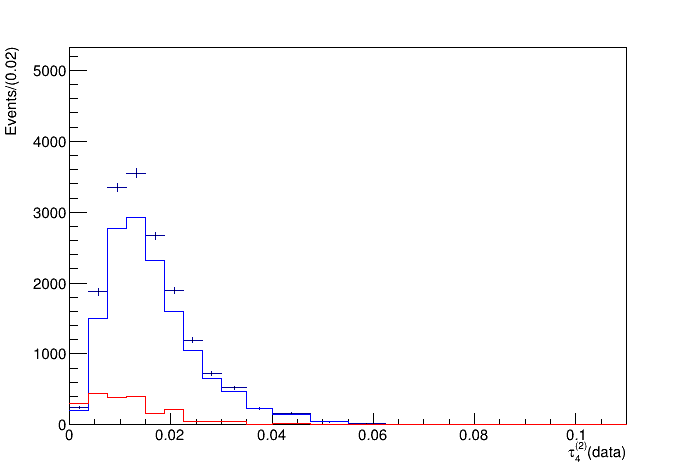

In [103]:
# Step 7: plots
output = ROOT.TCanvas();
#output.Divide(3,2);
#output.cd(1);
# data, MC prediction, background
#histMdetData.SetMinimum(0.0);
histMdetData.SetMaximum(histMdetData.GetMaximum()*1.5);
histMdetData.Draw("E");
#histMdetMC_sig.SetMinimum(0.0);
histMdetMC_sig.SetLineColor(ROOT.kBlue);
histMdetNormBgrTotal.SetLineColor(ROOT.kRed);
#histdetNormBgr1.SetLineColor(ROOT.kCyan);
histMdetMC_sig.Draw("SAME HIST");
#histdetNormBgr1.Draw("SAME HIST");
histMdetNormBgrTotal.Draw("SAME HIST");
output.Draw()

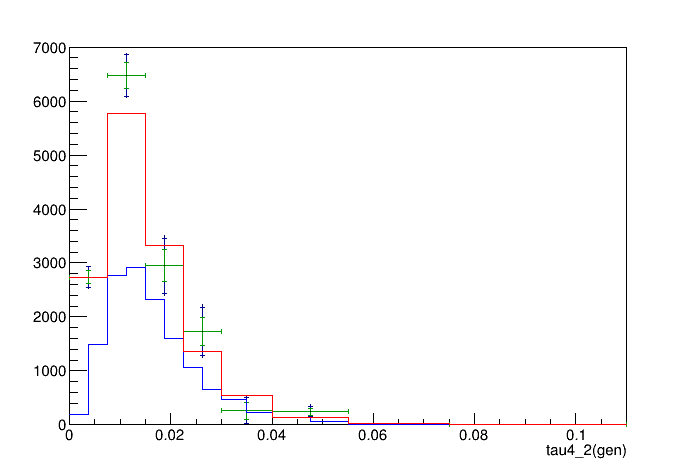

In [104]:
#output.cd(2)
# unfolded data, data truth, MC truth
output = ROOT.TCanvas();
histUnfoldTotal.SetMinimum(0.0);
histUnfoldTotal.SetMaximum(7000);
histUnfoldTotal.SetLineColor(ROOT.kBlue+3)
histUnfoldTotal.SetLineWidth(1)
# outer error: total error
histUnfoldTotal.Draw("E");
# middle error: stat+bgr
histUnfoldOutput.SetLineWidth(1)
histUnfoldOutput.Draw("SAME E1");
# inner error: stat only
histUnfoldStat.SetLineColor(ROOT.kGreen+2)
histUnfoldStat.Draw("SAME E1");

histMdetMC_sig.Draw("SAME HIST");
histMgenMC_sig.Draw("SAME HIST");
#histBbbSignalGen.SetLineColor(ROOT.kBlue);
#histBbbSignalGen.Draw("SAME HIST");
output.Draw()

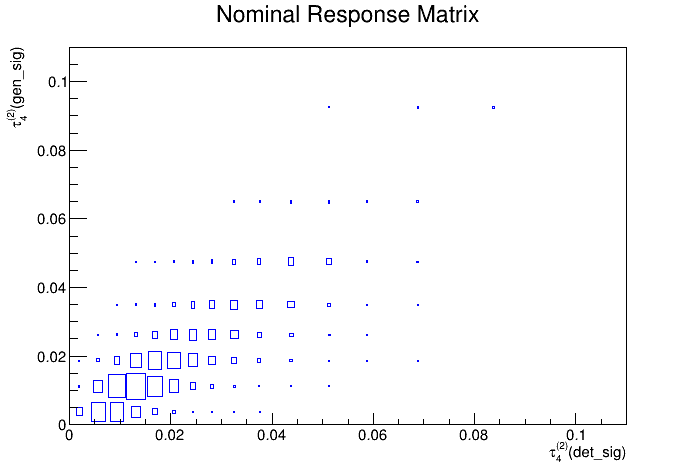

In [105]:
output.cd(3);
# unfolding matrix
response.SetLineColor(ROOT.kBlue);
response.Draw("BOX");

output.Draw()

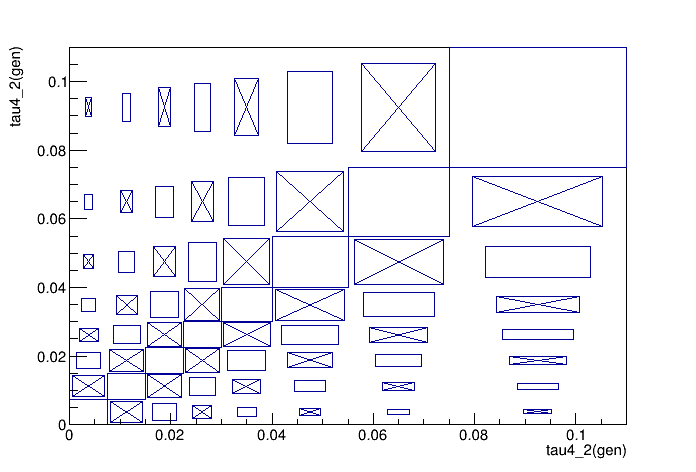

In [106]:
# show tau as a function of chi**2
output.cd(4);
#logTauX.Draw();
#bestLogTauLogChi2.SetMarkerColor(ROOT.kRed);
#bestLogTauLogChi2.Draw("*");
# show the L curve
output.cd(5);
#lCurve.Draw("AL");
#bestLcurve.SetMarkerColor(ROOT.kRed);
#bestLcurve.Draw("*");
# show correlation matrix
output.cd(6);
histCorr.Draw("BOX");
output.Draw()